# Projet 2
# Analysez des données de systèmes éducatifs

## Problématique

- Quels sont les pays avec un fort potentiel de clients pour nos services ?
- Pour chacun de ces pays, quelle sera l’évolution de ce potentiel de clients ?
- Dans quels pays l'entreprise doit-elle opérer en priorité ?


## Missions

- Valider la qualité du jeu de données de la banque mondiale;
- Décrire les informations contenues dans ce jeu de de données;
- Sélectionner les informations pertinentes pour répondre à la problématique de l'entreprise
- Déterminer les ordres de grandeurs des indicateurs statistiques (moyenne, médiane, écart-type, etc...) par pays ou par région géographique

## Compétences évaluées

- Manipuler des données avec des librairies Python spécialisées
- Mettre en place un environnement Python
- Effectuer une représentation graphique à l'aide d'une librairie Python adaptée
- Maîtriser les opérations fondamentales du langage Python pour la Data Science
- Utiliser un notebook Jupyter pour faciliter la rédaction du code et la collaboration

## 1. Description des données de la banque mondiale

La base de données téléchargée sur la plateforme de la banque mondiale est composé de 5 fichiers csv: EdStatsCountry.csv, EdStatsCountry-Series.csv, EdStatsData.csv, EdStatsFootNote.csv et EdStatsSeries.csv. Explorons le contenu de chaque fichier:

In [523]:
%matplotlib inline

import numpy as np
import pandas as pd
from datetime import datetime
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns

plt.rcParams["figure.figsize"]=20,20
#sns.set_style("white")

In [524]:
# Lecture des différents fichiers

edStatsCountry       = pd.read_csv('EdStatsCountry.csv')
edStatsCountrySeries = pd.read_csv('EdStatsCountry-Series.csv')
edStatsData          = pd.read_csv('EdStatsData.csv')
edStatsFootNote      = pd.read_csv('EdStatsFootNote.csv')
edStatsSeries        = pd.read_csv('EdStatsSeries.csv')

In [525]:
edStatsCountry.head()

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,National accounts base year,National accounts reference year,SNA price valuation,Lending category,Other groups,System of National Accounts,Alternative conversion factor,PPP survey year,Balance of Payments Manual in use,External debt Reporting status,System of trade,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,2000,NaN,Value added at basic prices (VAB),NaN,NaN,Country uses the 1993 System of National Accou...,NaN,NaN,"IMF Balance of Payments Manual, 6th edition.",NaN,Special trade system,NaN,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,2002/03,NaN,Value added at basic prices (VAB),IDA,HIPC,Country uses the 1993 System of National Accou...,NaN,NaN,NaN,Actual,General trade system,Consolidated central government,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,2002,NaN,Value added at producer prices (VAP),IBRD,NaN,Country uses the 1993 System of National Accou...,1991–96,2005,"IMF Balance of Payments Manual, 6th edition.",Actual,Special trade system,Budgetary central government,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,Original chained constant price data are resca...,1996.0,Value added at basic prices (VAB),IBRD,NaN,Country uses the 1993 System of National Accou...,NaN,Rolling,"IMF Balance of Payments Manual, 6th edition.",Actual,General trade system,Budgetary central government,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,1990,NaN,NaN,NaN,NaN,Country uses the 1968 System of National Accou...,NaN,NaN,NaN,NaN,Special trade system,NaN,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN,NaN


In [526]:
edStatsCountry['Region'].unique()

array(['Latin America & Caribbean', 'South Asia', 'Sub-Saharan Africa',
       'Europe & Central Asia', nan, 'Middle East & North Africa',
       'East Asia & Pacific', 'North America'], dtype=object)

In [527]:
edStatsCountry.shape

(241, 32)

In [528]:
edStatsCountry.size

7712

In [529]:
print(edStatsCountry.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 32 columns):
Country Code                                         241 non-null object
Short Name                                           241 non-null object
Table Name                                           241 non-null object
Long Name                                            241 non-null object
2-alpha code                                         238 non-null object
Currency Unit                                        215 non-null object
Special Notes                                        145 non-null object
Region                                               214 non-null object
Income Group                                         214 non-null object
WB-2 code                                            240 non-null object
National accounts base year                          205 non-null object
National accounts reference year                     32 non-null float64
SNA price valuation

In [530]:
edStatsCountry.isna().sum().sum()

2354

In [531]:
edStatsCountry['Region'].value_counts()

Europe & Central Asia         57
Sub-Saharan Africa            48
Latin America & Caribbean     41
East Asia & Pacific           36
Middle East & North Africa    21
South Asia                     8
North America                  3
Name: Region, dtype: int64

In [532]:
edStatsCountrySeries.head()

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.,NaN
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population...,NaN


In [533]:
edStatsCountrySeries.shape

(613, 4)

In [534]:
print(edStatsData.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 70 columns):
Country Name      886930 non-null object
Country Code      886930 non-null object
Indicator Name    886930 non-null object
Indicator Code    886930 non-null object
1970              72288 non-null float64
1971              35537 non-null float64
1972              35619 non-null float64
1973              35545 non-null float64
1974              35730 non-null float64
1975              87306 non-null float64
1976              37483 non-null float64
1977              37574 non-null float64
1978              37576 non-null float64
1979              36809 non-null float64
1980              89122 non-null float64
1981              38777 non-null float64
1982              37511 non-null float64
1983              38460 non-null float64
1984              38606 non-null float64
1985              90296 non-null float64
1986              39372 non-null float64
1987              38641 non-

In [535]:
edStatsData.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,60.999962,61.92268,62.69342,64.383186,65.617767,66.085152,66.608139,67.290451,68.510094,69.033211,69.944908,71.04187,71.693779,71.699097,71.995819,72.602837,70.032722,70.464821,72.645683,71.81176,73.903511,74.425201,75.110817,76.254318,77.245682,78.800522,80.051399,80.805389,81.607063,82.489487,82.685509,83.280342,84.011871,84.195961,85.211998,85.24514,86.101669,85.51194,85.320152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [536]:
list(edStatsData.columns)

['Country Name',
 'Country Code',
 'Indicator Name',
 'Indicator Code',
 '1970',
 '1971',
 '1972',
 '1973',
 '1974',
 '1975',
 '1976',
 '1977',
 '1978',
 '1979',
 '1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2020',
 '2025',
 '2030',
 '2035',
 '2040',
 '2045',
 '2050',
 '2055',
 '2060',
 '2065',
 '2070',
 '2075',
 '2080',
 '2085',
 '2090',
 '2095',
 '2100',
 'Unnamed: 69']

In [537]:
edStatsData['Country Name'].unique()

array(['Arab World', 'East Asia & Pacific',
       'East Asia & Pacific (excluding high income)', 'Euro area',
       'Europe & Central Asia',
       'Europe & Central Asia (excluding high income)', 'European Union',
       'Heavily indebted poor countries (HIPC)', 'High income',
       'Latin America & Caribbean',
       'Latin America & Caribbean (excluding high income)',
       'Least developed countries: UN classification',
       'Low & middle income', 'Low income', 'Lower middle income',
       'Middle East & North Africa',
       'Middle East & North Africa (excluding high income)',
       'Middle income', 'North America', 'OECD members', 'South Asia',
       'Sub-Saharan Africa', 'Sub-Saharan Africa (excluding high income)',
       'Upper middle income', 'World', 'Afghanistan', 'Albania',
       'Algeria', 'American Samoa', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain',


In [538]:
edStatsData['Country Name'].value_counts()

Burkina Faso              3665
British Virgin Islands    3665
Hong Kong SAR, China      3665
Low income                3665
Cuba                      3665
                          ... 
Kyrgyz Republic           3665
Marshall Islands          3665
Belize                    3665
Isle of Man               3665
Denmark                   3665
Name: Country Name, Length: 242, dtype: int64

In [539]:
edStatsData['Indicator Name'].unique()

array(['Adjusted net enrolment rate, lower secondary, both sexes (%)',
       'Adjusted net enrolment rate, lower secondary, female (%)',
       'Adjusted net enrolment rate, lower secondary, gender parity index (GPI)',
       ..., 'Youth literacy rate, population 15-24 years, female (%)',
       'Youth literacy rate, population 15-24 years, gender parity index (GPI)',
       'Youth literacy rate, population 15-24 years, male (%)'],
      dtype=object)

In [540]:
edStatsData['Indicator Name'].unique().shape

(3665,)

In [541]:
edStatsData.isna().sum().sum()

53455179

In [542]:
percentOfNan = 100.0 * edStatsData.isna().sum().sum()/edStatsData.size
print(percentOfNan)

86.09985165522806


In [543]:
# Liste des fichiers

fileList = ['EdStatsCountry.csv','EdStatsCountry-Series.csv','EdStatsData.csv','EdStatsFootNote.csv','EdStatsSeries.csv']

# Liste des premières statistiques calculées


statList = ['Taille','Nbre ligne','Nbre colonne','Nbre NaN','Pourcentage de NaN']

statsValues = pd.DataFrame(columns=statList,index=fileList)

for ifil in fileList:
    print(ifil)
    
    data = pd.read_csv(ifil)
    data = data.loc[:, ~data.columns.str.contains('^Unnamed')]
    
    nbRows = data.shape[0]
    nbCols = data.shape[1]
    nbNaN = data.isna().sum().sum()
    pNaN = round(100.0 * nbNaN/data.size,2)
    
    statsValues.loc[ifil] = [data.size,nbRows,nbCols,nbNaN,pNaN]

statsValues

EdStatsCountry.csv
EdStatsCountry-Series.csv
EdStatsData.csv
EdStatsFootNote.csv
EdStatsSeries.csv


,Taille,Nbre ligne,Nbre colonne,Nbre NaN,Pourcentage de NaN
EdStatsCountry.csv,7471,241,31,2113,28.28
EdStatsCountry-Series.csv,1839,613,3,0,0
EdStatsData.csv,61198170,886930,69,52568249,85.9
EdStatsFootNote.csv,2574552,643638,4,0,0
EdStatsSeries.csv,73300,3665,20,51538,70.31


Le fichiers EdStatsCountry.csv la liste des pays et régions dont les données sont disponibles dans le fichier EdStatsData.csv. Ces informations contenues dans les colonnes sont accompagnées des codes, de la monnaie de ces pays et d'autres notes spéciales. Dans la colonne 2 "Short Name" qui contient la liste des pays, nous constatons la présence d'entrées autres que des pays qui representent soit des régions ou soit des unions monétaires.

Pour ce fichier, les colonnes "Country Code","Short Name","Table Name","Currency Unit","Region" seront retenues. Elles nous permettrons de faire des groupages par région ou par union monétaire.

Travail à effectuer:
- Sélectionner les colonnes pertinentes;
- Nettoyer ces colonnes pour obtenir un tableau propre.

In [544]:
edStatsData.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,60.999962,61.92268,62.69342,64.383186,65.617767,66.085152,66.608139,67.290451,68.510094,69.033211,69.944908,71.04187,71.693779,71.699097,71.995819,72.602837,70.032722,70.464821,72.645683,71.81176,73.903511,74.425201,75.110817,76.254318,77.245682,78.800522,80.051399,80.805389,81.607063,82.489487,82.685509,83.280342,84.011871,84.195961,85.211998,85.24514,86.101669,85.51194,85.320152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [545]:
edStatsCountryNew = edStatsCountry[["Country Code","Short Name","Table Name","Currency Unit","Region"]]

validRegion = edStatsCountry['Region'].dropna().unique()

othersRegion = np.array(['Arab World','East Asia & Pacific (excluding high income)',
                'East Asia & Pacific (developing only)','East Asia & Pacific (all income levels)','Euro area',
                'Europe & Central Asia (excluding high income)','Europe & Central Asia (developing only)',
                'Europe & Central Asia (all income levels)','European Union',
                'Heavily indebted poor countries (HIPC)','High income',
                'Latin America & Caribbean (excluding high income)','Latin America & Caribbean (developing only)',
                'Latin America & Caribbean (all income levels)','Least developed countries: UN classification',
                'Low & middle income','Low income','Lower middle income',
                'Middle East & North Africa (excluding high income)',
                'Middle East & North Africa (all income levels)','Middle East & North Africa (developing only)',
                'Middle income','OECD members','Sub-Saharan Africa (excluding high income)',
                'Sub-Saharan Africa (developing only)','Sub-Saharan Africa (all income levels)',
                'Upper middle income','World'])

listOfRegion = list(validRegion) + list(othersRegion)
edStatsCountryNew = edStatsCountryNew[~edStatsCountryNew['Table Name'].isin(listOfRegion)]

edStatsCountryNew.loc[edStatsCountryNew[edStatsCountryNew['Table Name'] == 'Nauru'].index[0]].iat[3] = 'Australian dollar'
edStatsCountryNew.loc[edStatsCountryNew[edStatsCountryNew['Table Name'] == 'Nauru'].index[0]].iat[4] = 'East Asia & Pacific'
edStatsCountryNew.loc[edStatsCountryNew[edStatsCountryNew['Table Name'] == 'Gibraltar'].index[0]].iat[4] = 'Europe & Central Asia'

edStatsData["Country Name"] = edStatsData["Country Name"].replace("Cote d'Ivoire","Côte d'Ivoire")

validCountry = edStatsCountryNew['Table Name']

edStatsCountryNew.to_csv('edStatsCountryNew.csv')
#print(edStatsCountryNew.isna().sum().sum())
#print(edStatsCountryNew.shape)
edStatsCountryNew.head(n=20)

edStatsData.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,60.999962,61.92268,62.69342,64.383186,65.617767,66.085152,66.608139,67.290451,68.510094,69.033211,69.944908,71.04187,71.693779,71.699097,71.995819,72.602837,70.032722,70.464821,72.645683,71.81176,73.903511,74.425201,75.110817,76.254318,77.245682,78.800522,80.051399,80.805389,81.607063,82.489487,82.685509,83.280342,84.011871,84.195961,85.211998,85.24514,86.101669,85.51194,85.320152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


A ce stade, Gibraltar n'appartient à aucune région selon les informations du fichier. Nous l'avons ajouter à la région "Europe & Central Asia".

Nauru également ne dispose pas de monnaie et de région dans le fichier. Les valeurs correspondantes ont été ajoutées en considération des informations disponible dans la litérature. Current unit = "Australian dollar" et Region = "East Asia & Pacific".

Le fichier EdStatsCountry-Series.csv contient les codes des indicateurs par pays et leurs sources. Il sera éventuellement utile pour la vérification des sources.

Le fichier EdStatsSeries.csv contient la liste des indicateurs organisées en grandes thématiques, leurs codes, définitions et d'autre informations telles que les limitations et exceptions de ces indicateurs. Il est utile pour la détermination des indicateurs pertinents pour notre étude.

Enfin, le fichier EdStatsData.csv contient l'ensemble des données à utiliser pour mener à bien cette études. Les colonnes qui contiennent les informations dont nous avons besoins sont: "Country Name", "Indicator Name", et les colonnes de 1970 à 2100.

## 2. Sélection des indicateurs pertinents pour l'étude

La start-up Academy fournit des cours en ligne pour un public lycée et université dont l'age varie entre 15 et 24 ans.

Indicateurs sélectionnées:
- Population, ages 15-24, total
- Human Capital Index (HCI) Score: Total (Scale 0-1)
- Internet users (per 100 people)
- Personal computers (per 100 people)
- Government expenditure on education as % of GDP (%)
- Expenditure on education as % of total government expenditure (%)
- SABER: (Engaging the Private Sector) Policy Goal 1: Encouraging innovation by providers
- PIAAC: Young adults by proficiency level in problem solving in technology-rich environments (%). Level 1

## 3. Extraction, nettoyage des données et calcul de quelques statistiques

In [650]:
def get_data(dataFrame,area,indicator):
    if area == 'region':
        checklist = validRegion
    else:
        checklist = validCountry
        
    tab = dataFrame[dataFrame['Country Name'].isin(checklist)]
    
    yearList = list(map(str,range(1970,2100,1)))
    validYearColumns = [yy for yy in yearList if yy in dataFrame.columns]
    
    tab = tab.loc[tab['Indicator Name'] == indicator].dropna(how='all', subset=validYearColumns).dropna(axis=1,
            how='all')
    newTab = tab
    if (not tab.empty):
        tab=tab.drop(['Indicator Code'],axis=1)
        tab1 = edStatsCountryNew[['Country Code','Region']]
        newTab = tab1.merge(tab,on='Country Code')
    
    return newTab

testFunction = get_data(edStatsData,'country','Personal computers (per 100 people)')

In [651]:
testFunction.to_csv('momo.csv')
testFunction.head(n=20)

,Country Code,Region,Country Name,Indicator Name,1970,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009
0,ABW,Latin America & Caribbean,Aruba,Personal computers (per 100 people),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.923544,9.917683,NaN,NaN,NaN
1,AFG,South Asia,Afghanistan,Personal computers (per 100 people),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.341903,0.390148,NaN,NaN,NaN
2,AGO,Sub-Saharan Africa,Angola,Personal computers (per 100 people),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.062542,0.076118,0.088819,0.107720,0.118176,0.181371,NaN,NaN,0.564518,0.646019,NaN,NaN,NaN
3,ALB,Europe & Central Asia,Albania,Personal computers (per 100 people),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.149654,0.300182,0.451066,0.602783,0.756442,0.912941,1.103078,1.296542,1.492446,1.689543,3.774092,4.105840,4.593538,NaN
4,ARE,Middle East & North Africa,United Arab Emirates,Personal computers (per 100 people),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.980660,3.667834,4.298529,4.906694,6.475609,7.665793,9.079360,10.367536,13.217233,13.409516,13.957951,19.292104,23.232562,25.308017,28.714185,NaN,NaN,NaN
5,ARG,Latin America & Caribbean,Argentina,Personal computers (per 100 people),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.441457,0.559520,0.720309,0.876790,0.984463,1.354457,3.436112,3.565567,4.154370,4.777144,5.303337,5.751131,6.937093,7.780356,7.972883,8.164252,8.353177,9.056130,NaN,NaN,NaN,NaN
6,ARM,Europe & Central Asia,Armenia,Personal computers (per 100 people),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.286839,0.481857,0.646450,0.812718,1.143806,1.969149,3.392586,6.610146,9.851017,NaN,NaN,NaN,NaN
7,ATG,Latin America & Caribbean,Antigua and Barbuda,Personal computers (per 100 people),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.130173,11.245783,12.360328,13.460927,14.655120,20.966370,NaN,NaN,NaN
8,AUS,East Asia & Pacific,Australia,Personal computers (per 100 people),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.248343,13.055541,14.950106,16.004245,18.360420,20.678598,23.923049,27.471087,28.900100,32.860285,36.712767,42.044546,46.730484,51.315585,56.303379,60.140967,NaN,NaN,NaN,NaN,NaN,NaN
9,AUT,Europe & Central Asia,Austria,Personal computers (per 100 people),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.943959,5.241750,6.518904,7.765546,8.977585,10.162136,11.337547,16.279768,17.479582,21.212549,23.723160,28.721842,36.158420,42.238963,48.196916,55.266790,57.718899,60.641342,NaN,NaN,NaN,NaN


In [652]:
indicator = 'Population, ages 15-24, total'

pop1524TotalByCountry = get_data(edStatsData,'country',indicator) 
pop1524TotalByCountry = pop1524TotalByCountry.dropna(how='any')

data = pop1524TotalByCountry.drop(['Country Code','Region','Country Name','Indicator Name'],axis=1)

trend = []

for index, row in pop1524TotalByCountry.iterrows():
    X = np.arange(0,len(row['1990':]),1).reshape(-1,1)
    Y = row['1990':]
    
    trend.append(float(LinearRegression().fit(X,Y).coef_))

pop1524TotalByCountry['MEAN'] = data.mean(axis=1)
pop1524TotalByCountry['MEDIAN'] = data.median(axis=1)
pop1524TotalByCountry['STD'] = data.std(axis=1)
pop1524TotalByCountry['VARIANCE'] = data.var(axis=1)
pop1524TotalByCountry['CHANGE'] = 100.0 * ((data['2015'] - data['2000'])/data['2000'])

pop1524TotalByCountry['SKEWNESS'] = data.skew(axis=1)
pop1524TotalByCountry['KURTOSIS'] = data.kurtosis(axis=1)

pop1524TotalByCountry.to_csv('momo.csv')
pop1524TotalByCountry.head()

,Country Code,Region,Country Name,Indicator Name,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,MEAN,MEDIAN,STD,VARIANCE,CHANGE,SKEWNESS,KURTOSIS
0,ABW,Latin America & Caribbean,Aruba,"Population, ages 15-24, total",8604.0,9014.0,9377.0,10216.0,10267.0,10534.0,10932.0,11166.0,11356.0,11197.0,11278.0,11534.0,11465.0,11822.0,12394.0,13080.0,13260.0,13298.0,13260.0,13236.0,13299.0,13466.0,13708.0,13990.0,14253.0,14455.0,1.194081e+04,11678.0,1.661945e+03,2.762060e+06,28.169888,-0.330267,-0.849618
1,AFG,South Asia,Afghanistan,"Population, ages 15-24, total",2423555.0,2587510.0,2808220.0,3056374.0,3291124.0,3483752.0,3622742.0,3718459.0,3790896.0,3870496.0,3979438.0,4122669.0,4293057.0,4486256.0,4694142.0,4910340.0,5134377.0,5367499.0,5606736.0,5848604.0,6090239.0,6330684.0,6569239.0,6803785.0,7032072.0,7252785.0,4.660579e+06,4389656.5,1.433015e+06,2.053533e+12,82.256515,0.290311,-1.023012
2,AGO,Sub-Saharan Africa,Angola,"Population, ages 15-24, total",2001583.0,2061484.0,2129048.0,2201917.0,2276480.0,2350226.0,2422316.0,2493940.0,2567045.0,2644473.0,2728211.0,2818589.0,2914678.0,3015635.0,3120154.0,3227067.0,3336494.0,3448163.0,3560040.0,3669555.0,3774989.0,3875706.0,3972550.0,4067194.0,4162115.0,4259352.0,3.042269e+06,2965156.5,7.133322e+05,5.088429e+11,56.122529,0.205604,-1.266046
3,ALB,Europe & Central Asia,Albania,"Population, ages 15-24, total",641446.0,629684.0,610552.0,587602.0,565873.0,549079.0,538262.0,532558.0,531422.0,533656.0,538251.0,545188.0,554507.0,565217.0,576075.0,586049.0,594862.0,602317.0,607609.0,609841.0,608456.0,603104.0,594101.0,582411.0,569427.0,556269.0,5.774545e+05,579243.0,3.174462e+04,1.007721e+09,3.347509,0.137405,-0.968684
5,ARE,Middle East & North Africa,United Arab Emirates,"Population, ages 15-24, total",277717.0,296819.0,317292.0,339282.0,363000.0,388528.0,415614.0,443901.0,473183.0,503225.0,533656.0,564800.0,596140.0,625485.0,649984.0,667785.0,677710.0,680787.0,680082.0,679963.0,683545.0,692184.0,704899.0,719641.0,733259.0,743608.0,5.558496e+05,610812.5,1.543570e+05,2.382607e+10,39.342198,-0.525678,-1.250647


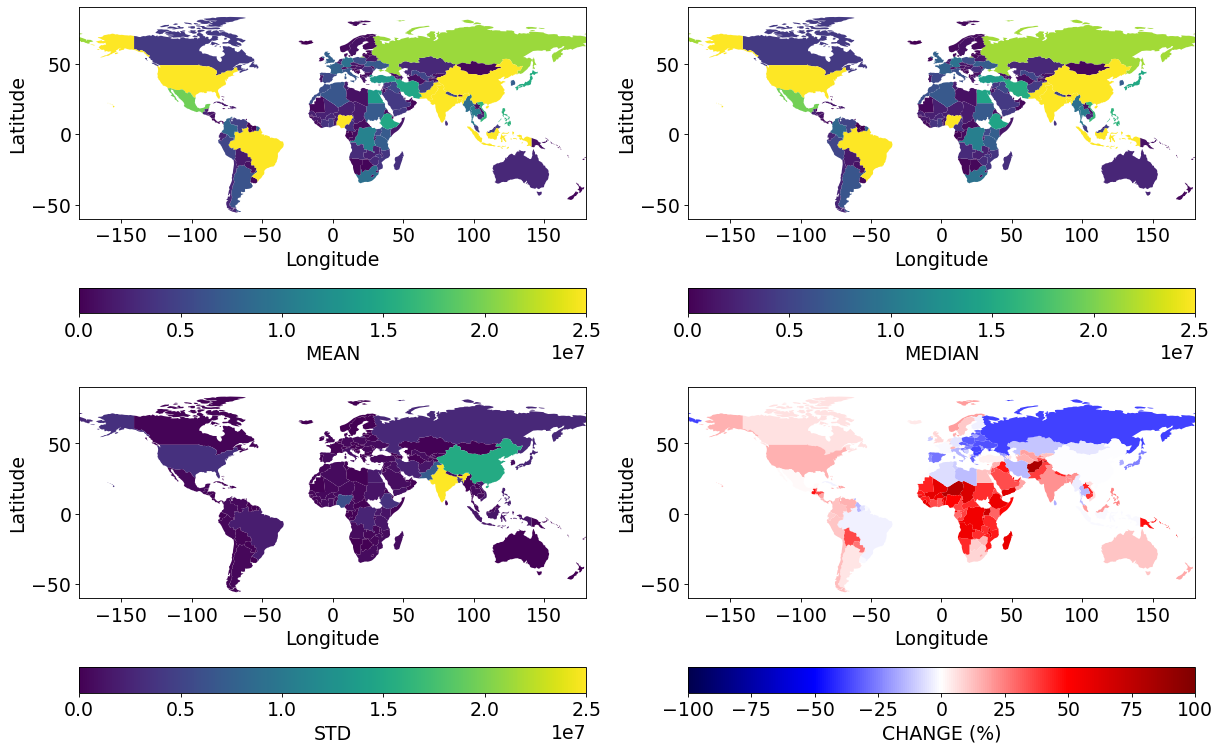

In [705]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

shapefile = '/home/famien/Bureau/OpenClassrooms/Parcours/Data scientist/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp'

gdf = gpd.read_file(shapefile)[['ADMIN', 'ADM0_A3', 'geometry']]
gdf['ADMIN'] = gdf['ADMIN'].replace("Ivory Coast","Côte d'Ivoire")
#gdf['ADM0_A3'] = gdf['ADM0_A3'].replace("SDS","SSD")

mergedData = gdf.merge(pop1524TotalByCountry, left_on='ADM0_A3', right_on='Country Code')

plt.rcParams.update({'font.size': 17})
fig = plt.figure(figsize=(18, 12), dpi= 80, facecolor='w', edgecolor='k')

ax1 = plt.subplot(2,2, 1,xlabel='Longitude',ylabel='Latitude')
ax1.set_xlim(-180,180)
ax1.set_ylim(-60,90)

plot1 = mergedData.plot(column='MEAN',cmap = 'viridis', figsize=(18, 12), vmin=0, vmax= 25000000,
           ax = ax1,
           legend = True,
           legend_kwds = {'label':"MEAN",'orientation':"horizontal",'pad':0.2}
        )

ax2 = plt.subplot(2,2, 2,xlabel='Longitude',ylabel='Latitude')
ax2.set_xlim(-180,180)
ax2.set_ylim(-60,90)

mergedData.plot(column='MEDIAN',cmap = 'viridis', vmin=0, vmax= 25000000,
           ax = ax2,
           legend = True,
           legend_kwds={'label': "MEDIAN",'orientation': "horizontal",'pad':0.2}
           )

ax3 = plt.subplot(2,2, 3,xlabel='Longitude',ylabel='Latitude')
ax3.set_xlim(-180,180)
ax3.set_ylim(-60,90)

mergedData.plot(column='STD',cmap = 'viridis', vmin=0, vmax= 25000000,
           ax = ax3,
           legend = True,
           legend_kwds={'label': "STD",'orientation': "horizontal",'pad':0.2}
           )

ax4 = plt.subplot(2,2, 4,xlabel='Longitude',ylabel='Latitude')
ax4.set_xlim(-180,180)
ax4.set_ylim(-60,90)

mergedData.plot(column='CHANGE',cmap = 'seismic', vmin=-100, vmax= 100,
           ax = ax4,
           legend = True,
           legend_kwds={'label': "CHANGE (%)",'orientation': "horizontal",'pad':0.2}
           )

plt.subplots_adjust(wspace=0.2,hspace=0.1)
plt.savefig('map_of_country.png')
plt.show()

#pd.options.display.max_rows = 177
#pop1524TotalByCountry.head(n=177)

14455.0 244120201.0


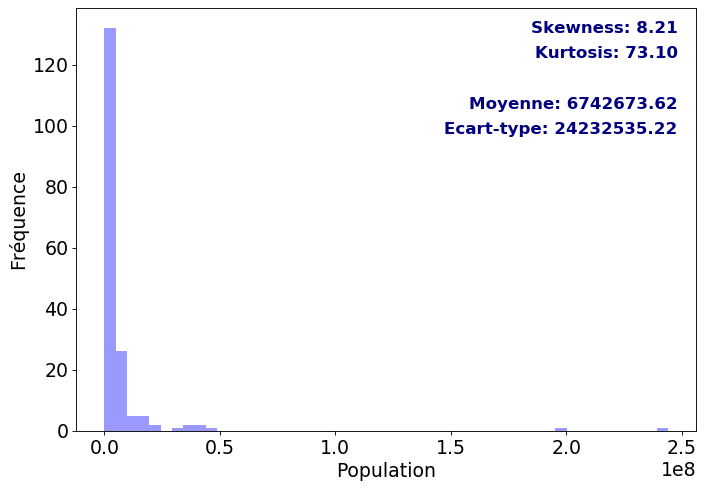

In [707]:
pd.options.display.max_rows = 177
gdf['ADM0_A3'].value_counts().head(n=177)

testdata = data['2015']
print(np.min(testdata),np.max(testdata))

fig = plt.figure(figsize=(10, 7), dpi= 80, facecolor='w', edgecolor='k')

ax = sns.distplot(data['2015'],kde=False,color="blue")

ax.text(x=0.97, y=0.97, transform=ax.transAxes, s="Skewness: %.2f" % data['2015'].skew(),\
        fontweight='demibold', fontsize=15, verticalalignment='top', horizontalalignment='right',\
        backgroundcolor='white', color='navy')
ax.text(x=0.97, y=0.91, transform=ax.transAxes, s="Kurtosis: %.2f" % data['2015'].kurt(),\
        fontweight='demibold', fontsize=15, verticalalignment='top', horizontalalignment='right',\
        backgroundcolor='white', color='navy')
ax.text(x=0.97, y=0.79, transform=ax.transAxes, s="Moyenne: %.2f" % data['2015'].mean(),\
        fontweight='demibold', fontsize=15, verticalalignment='top', horizontalalignment='right',\
        backgroundcolor='white', color='navy')
ax.text(x=0.97, y=0.73, transform=ax.transAxes, s="Ecart-type: %.2f" % data['2015'].std(),\
        fontweight='demibold', fontsize=15, verticalalignment='top', horizontalalignment='right',\
        backgroundcolor='white', color='navy')


plt.xlabel('Population')
plt.ylabel('Fréquence')
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)

plt.savefig('distribution_of_population.png')
plt.show()

In [709]:
indicator = 'Population, ages 15-24, total'

#print(pop1524TotalByCountry.head())
pop1524TotalByRegion = get_data(pop1524TotalByCountry,'region',indicator)

colIdx = ['Country Code','Region','Country Name','MEAN','MEDIAN','STD','VARIANCE','CHANGE']
pop1524TotalByRegion = pop1524TotalByCountry[colIdx].groupby(['Region']).mean()
pop1524TotalByRegion.head()

,MEAN,MEDIAN,STD,VARIANCE,CHANGE
Region,,,,,
East Asia & Pacific,1.391644e+07,1.387515e+07,1.076695e+06,9.896211e+12,13.795994
Europe & Central Asia,2.694271e+06,2.713381e+06,2.635815e+05,2.803421e+11,-9.053687
Latin America & Caribbean,3.221436e+06,3.248485e+06,2.355297e+05,1.947733e+11,10.159456
Middle East & North Africa,3.199140e+06,3.294022e+06,4.903389e+05,6.492115e+11,21.844440
North America,2.264608e+07,2.261289e+07,1.816559e+06,5.921012e+12,10.508578


In [710]:
pop1524TotalByCountry['Region'].value_counts()

Europe & Central Asia         46
Sub-Saharan Africa            45
Latin America & Caribbean     31
East Asia & Pacific           25
Middle East & North Africa    21
South Asia                     8
North America                  2
Name: Region, dtype: int64

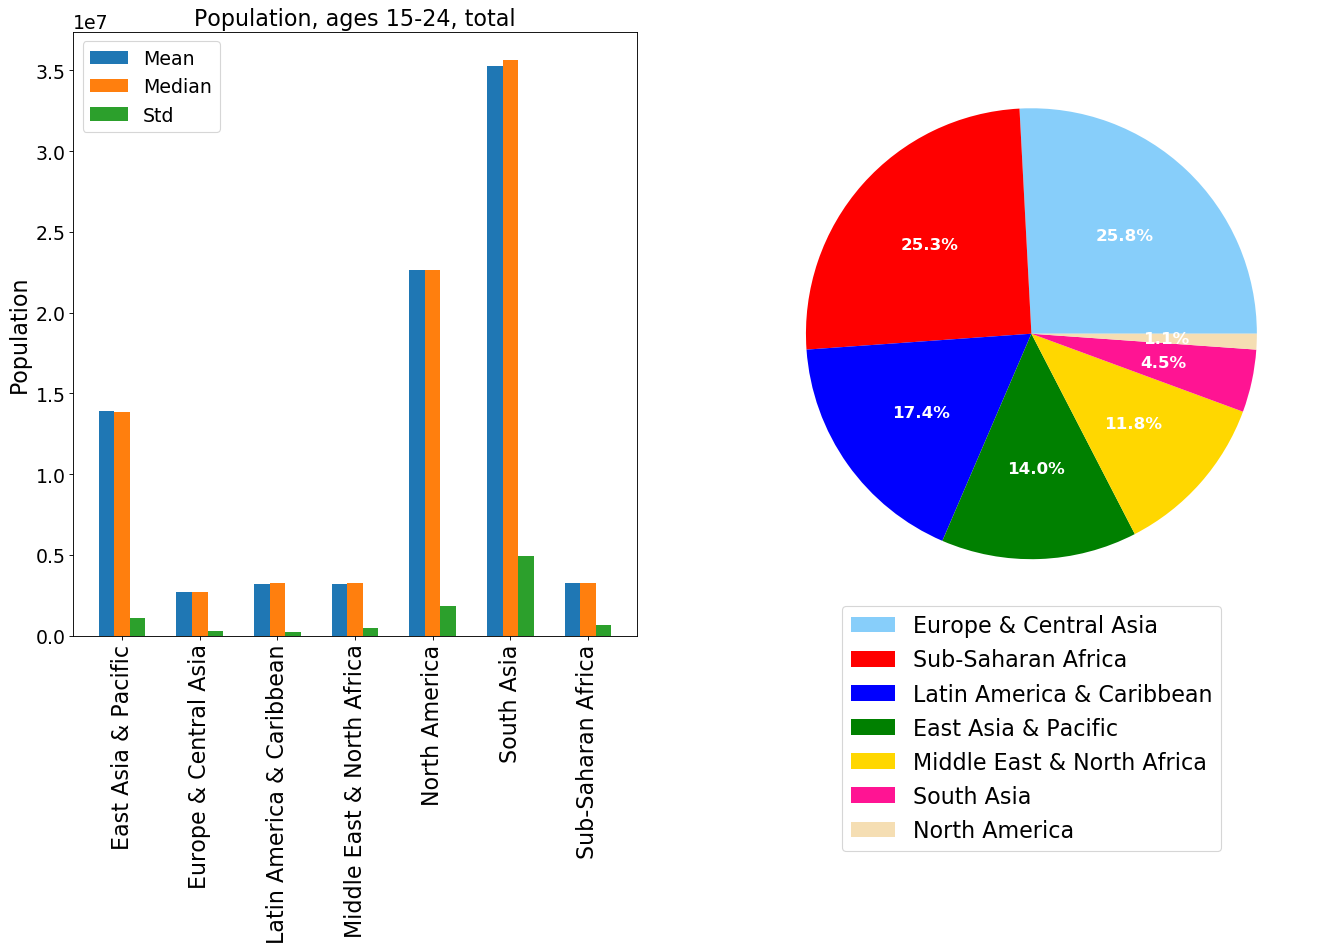

In [723]:
data = pop1524TotalByRegion[['MEAN','MEDIAN','STD']]
testDATA = pop1524TotalByRegion.loc['MEAN':]

#print(data.head())
#print(data.index)

width = 0.2
x = np.arange(len(data.index))

fig = plt.figure(figsize=(20, 10), dpi= 80, facecolor='w', edgecolor='k')

ax1 = plt.subplot(1,2, 1)

bar1 = ax1.bar(x - width,data['MEAN'].values,width,label='Mean')
bar2 = ax1.bar(x,data['MEDIAN'].values,width,label='Median')
bar3 = ax1.bar(x + width,data['STD'].values,width,label='Std')

ax1.set_ylabel('Population',fontsize=20)
ax1.set_title('Population, ages 15-24, total',fontsize=20)
ax1.set_xticks(x)
ax1.set_xticklabels(data.index,rotation=90,fontsize=20)
ax1.legend()

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%".format(pct, absolute)

colors = ['lightskyblue', 'red', 'blue', 'green', 'gold','deeppink','wheat']

ax2 = plt.subplot(1,2, 2)

wedges, texts, autotexts = ax2.pie(pop1524TotalByCountry['Region'].value_counts(),
                                   autopct=lambda pct: func(pct, pop1524TotalByCountry['Region'].value_counts())
                                   ,colors=colors,textprops=dict(color="w"))

ax2.legend(wedges, pop1524TotalByCountry['Region'].value_counts().index,
          #title="Regions",
          loc="center",
          fontsize = 20,
          bbox_to_anchor=(0.25, -0.7, 0.5, 1))


plt.setp(autotexts, size=15, weight="bold")
plt.savefig('population_stats_by_region.png',bbox_inches="tight")
plt.show()

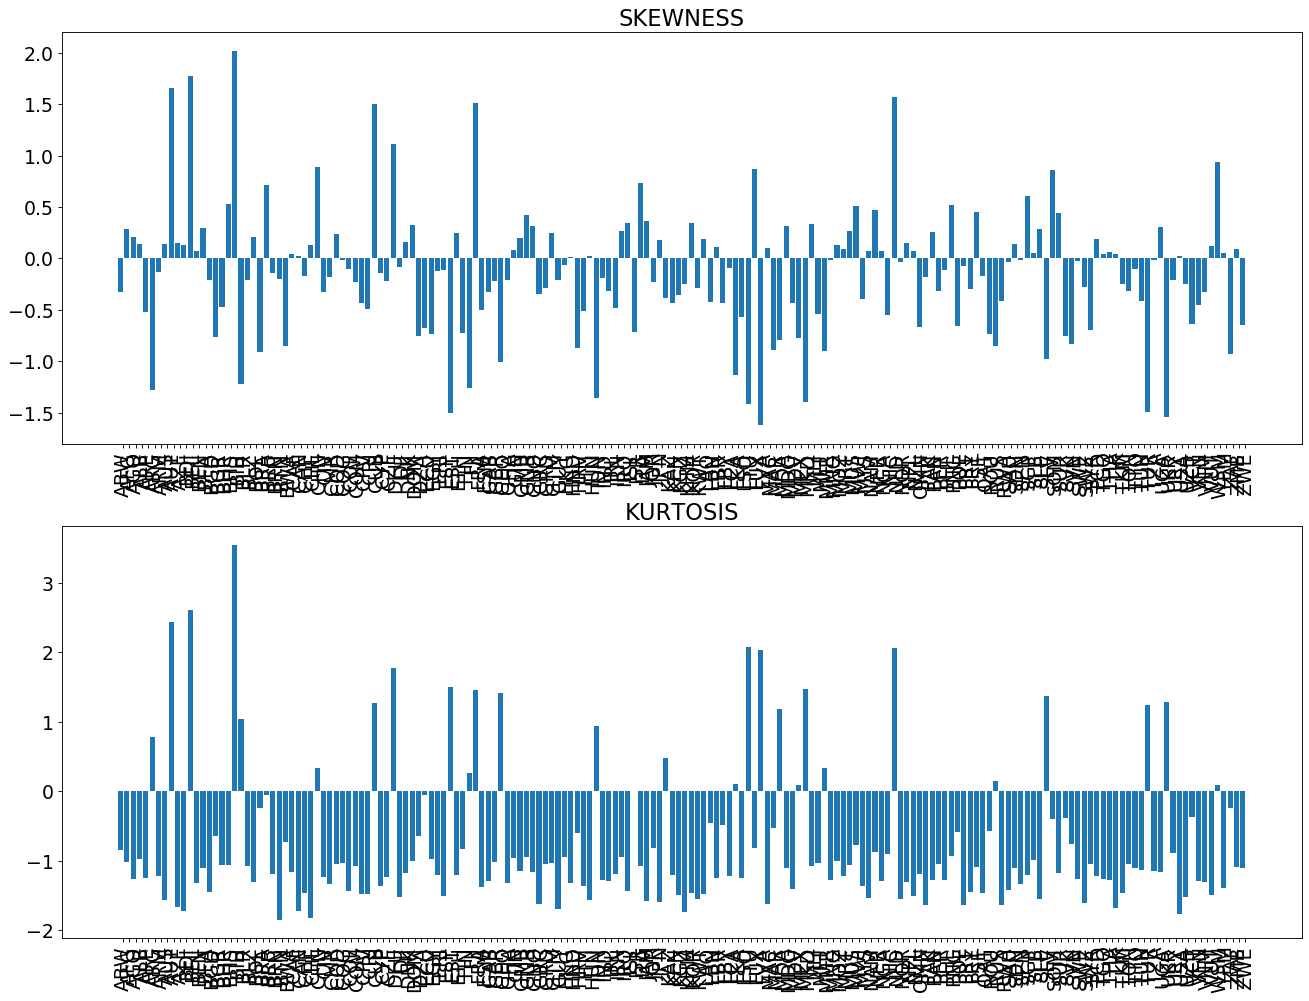

In [724]:
fig = plt.figure(figsize=(20, 15), dpi= 80, facecolor='w', edgecolor='k')

x = np.arange(pop1524TotalByCountry.shape[0])
width = 0.8

ax1 = plt.subplot(2,1,1)
ax1.bar(x - width/2,pop1524TotalByCountry['SKEWNESS'].values,width)
ax1.set_title('SKEWNESS')
ax1.set_xticks(np.arange(len(pop1524TotalByCountry['Country Code'].values)))
ax1.set_xticklabels(pop1524TotalByCountry['Country Code'].values)
plt.xticks(rotation=90)

ax2 = plt.subplot(2,1,2)
ax2.bar(x - width/2,pop1524TotalByCountry['KURTOSIS'].values,width)
ax2.set_title('KURTOSIS')
ax2.set_xticks(np.arange(len(pop1524TotalByCountry['Country Code'].values)))
ax2.set_xticklabels(pop1524TotalByCountry['Country Code'].values)
plt.xticks(rotation=90)

plt.savefig('population_stats_shape_parameter.png',bbox_inches="tight")
plt.show()

In [725]:
indicator = 'Human Capital Index (HCI) Score: Total (Scale 0-1)'

# Récupération avec la fontion
hci = get_data(edStatsData,'country',indicator)
print(hci.head())

# Récupération sans la fonction
hci = edStatsData[edStatsData['Indicator Name'] == 'Human Capital Index (HCI) Score: Total (Scale 0-1)']
hci.head()

Empty DataFrame
Columns: []
Index: []


,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69


In [764]:
indicator = 'Internet users (per 100 people)'

internetUsers = get_data(edStatsData,'country',indicator).drop(['1970',
                        '1975','1976','1977','1978','1979','1980','1981','1982',
                        '1983','1984','1985','1986','1987','1988','1989'],axis=1).dropna(how='any')

data = internetUsers.drop(['Country Code','Region','Indicator Name','Country Name'],axis=1)

trend = []

for index, row in internetUsers.iterrows():
    X = np.arange(0,len(row['1990':]),1).reshape(-1,1)
    Y = row['1990':]
    
    trend.append(float(LinearRegression().fit(X,Y).coef_))
    
internetUsers['MEAN'] = data.mean(axis=1)
internetUsers['MEDIAN'] = data.median(axis=1)
internetUsers['STD'] = data.std(axis=1)
internetUsers['VARIANCE'] = data.var(axis=1)
internetUsers['SKEWNESS'] = data.skew(axis=1)
internetUsers['KURTOSIS'] = data.kurtosis(axis=1)
internetUsers['TREND'] = trend

internetUsers.to_csv('momo.csv')

print(internetUsers['Country Name'].count())

pd.options.display.max_rows = 100
pd.options.display.max_columns = 100
internetUsers.head(n=100)

36


,Country Code,Region,Country Name,Indicator Name,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,MEAN,MEDIAN,STD,VARIANCE,SKEWNESS,KURTOSIS,TREND
11,AUT,Europe & Central Asia,Austria,Internet users (per 100 people),0.130369,0.259082,0.642818,0.765343,1.393423,1.890211,6.909162,9.533974,15.421219,23.044317,33.730133,39.185450,36.560000,42.700000,54.280000,58.000000,63.600000,69.370000,72.87,73.45,75.17,78.739993,80.029994,80.618800,80.995825,83.940142,84.323331,43.242725,42.700000,32.582940,1061.647978,-0.144773,-1.679294,4.018592
13,BDI,Sub-Saharan Africa,Burundi,Internet users (per 100 people),0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000804,0.007979,0.015843,0.039204,0.077248,0.106001,0.118228,0.201273,0.349060,0.542143,0.657593,0.700000,0.81,0.90,1.00,1.110000,1.220000,1.264218,1.380000,4.866224,5.173627,0.760720,0.201273,1.314458,1.727799,2.747844,7.456510,0.119132
14,BEL,Europe & Central Asia,Belgium,Internet users (per 100 people),0.001007,0.020073,0.100041,0.199446,0.695995,0.991663,2.968412,4.938081,7.886623,13.772214,29.431692,31.288396,46.330000,49.970000,53.860000,55.820000,59.720000,64.440000,66.00,70.00,75.00,81.609996,80.719991,82.170200,85.000000,85.052900,86.516500,42.018638,49.970000,33.737493,1138.218421,-0.092492,-1.697754,4.150888
26,BRA,Latin America & Caribbean,Brazil,Internet users (per 100 people),0.000000,0.003288,0.012946,0.025498,0.037673,0.105138,0.450789,0.786079,1.477875,2.038732,2.870685,4.528495,9.149425,13.207586,19.073672,21.022747,28.178380,30.880000,33.83,39.22,40.65,45.690000,48.560000,51.040000,54.551002,58.327952,59.682747,20.940767,13.207586,21.779781,474.358861,0.526454,-1.328649,2.622207
32,CAN,North America,Canada,Internet users (per 100 people),0.361000,0.570386,0.915981,1.184558,2.378694,4.163525,6.760240,15.072357,24.897400,36.186440,51.300000,60.200000,61.593299,64.200000,65.955963,71.660000,72.400000,73.200000,76.70,80.30,80.30,83.000000,83.000000,85.800000,87.120000,88.470000,89.840000,50.649253,64.200000,34.321311,1177.952356,-0.489423,-1.516012,4.134615
33,CHE,Europe & Central Asia,Switzerland,Internet users (per 100 people),0.595714,1.179956,1.751713,2.167270,2.720004,3.552007,4.549657,15.100000,24.800000,34.000000,47.100000,55.100000,61.400000,65.100000,67.800000,70.100000,75.700000,77.200000,79.20,81.30,83.90,85.193028,85.200000,86.340000,87.400000,87.479056,89.405568,50.938295,65.100000,34.880790,1216.669522,-0.448686,-1.573037,4.205785
48,DEU,Europe & Central Asia,Germany,Internet users (per 100 people),0.125892,0.250274,0.435285,0.463635,0.922541,1.837738,3.054805,6.711087,9.877852,20.845983,30.216347,31.650939,48.820000,55.900000,64.730000,68.710000,72.160000,75.160000,78.00,79.00,82.00,81.270000,82.349998,84.170000,86.190000,87.589800,89.647101,46.003307,55.900000,35.786950,1280.705802,-0.203286,-1.799379,4.347128
51,DNK,Europe & Central Asia,Denmark,Internet users (per 100 people),0.097277,0.194057,0.386914,0.578330,1.344308,3.825656,5.714988,11.382005,22.668746,30.592041,39.172431,42.957525,64.250000,76.260000,80.930000,82.740000,86.650000,85.030000,85.02,86.84,88.72,89.810013,92.260012,94.629700,95.990000,96.330500,96.967785,54.123788,76.260000,39.253943,1540.872047,-0.356364,-1.729144,4.708905
57,ESP,Europe & Central Asia,Spain,Internet users (per 100 people),0.012874,0.025686,0.076845,0.127690,0.280070,0.380801,1.331847,2.803320,4.361892,7.085040,13.624961,18.148723,20.390000,39.930000,44.010000,47.880000,50.370000,55.110000,59.60,62.40,65.80,67.089999,69.810000,71.635000,76.190000,78.689600,80.561333,34.730581,39.930000,30.765163,946.495249,0.111113,-1.738125,3.768817
60,FIN,Europe & Central Asia,Finland,Internet users (per 100 people),0.401088,1.397439,1.886880,2.568461,4.915099,13.900304,16.780075,19.458683,25.452525,32.295092,37.248462,43.105363,62.430000,69.220000,72.390000,74.480000,79.660000,80.780000,83.67,82.49,86.89,88.709995,89.879998,91.514400,86.530393

<Figure size 8000x4000 with 0 Axes>

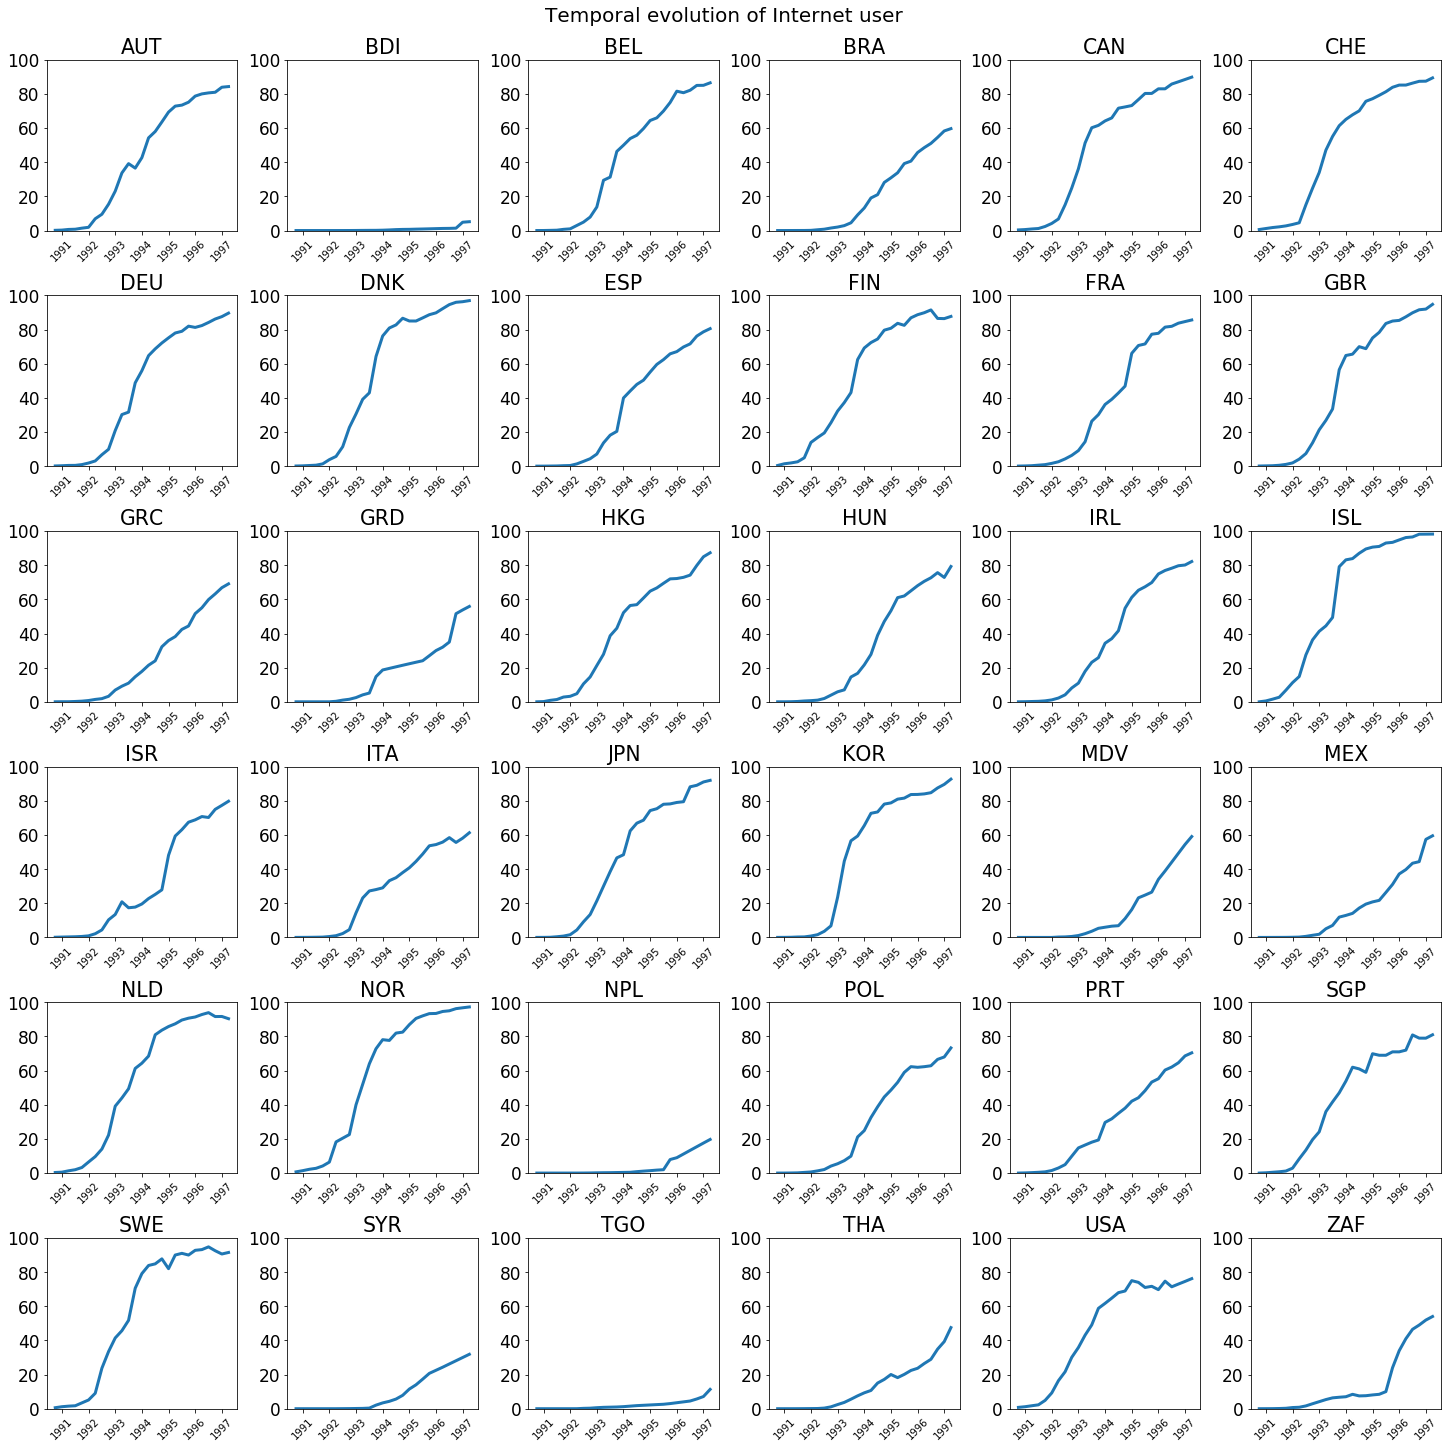

In [765]:
fig = plt.figure(figsize=(40, 20), dpi = 200, facecolor='w', edgecolor='k')

startDate = datetime.strptime('1990-01-01','%Y-%m-%d')
endDate = datetime.strptime('2016-12-31','%Y-%m-%d')
years = pd.date_range(startDate,endDate,freq='Y')
#print(pd.date_range(startDate,endDate,freq='Y'))

fig, axes = plt.subplots(nrows=6, ncols=6,constrained_layout=True)
#fig.subplots_adjust(hspace=0.5,wspace=0.2)
fig.suptitle('Temporal evolution of Internet user',fontsize=20)

for ax, feature, name in zip(axes.flatten(), data.values, internetUsers['Country Code'].values):
    ax.plot(years,feature,linewidth = 3.0)
    ax.set(title=name.upper())
    ax.set_ylim([0,100])
    ax.set_xticklabels(data.columns, rotation=45,fontsize=10)
    
plt.savefig('temporal_evolution_of_internet_users.png',bbox_inches="tight")
plt.show()

62    85.6222
dtype: float64


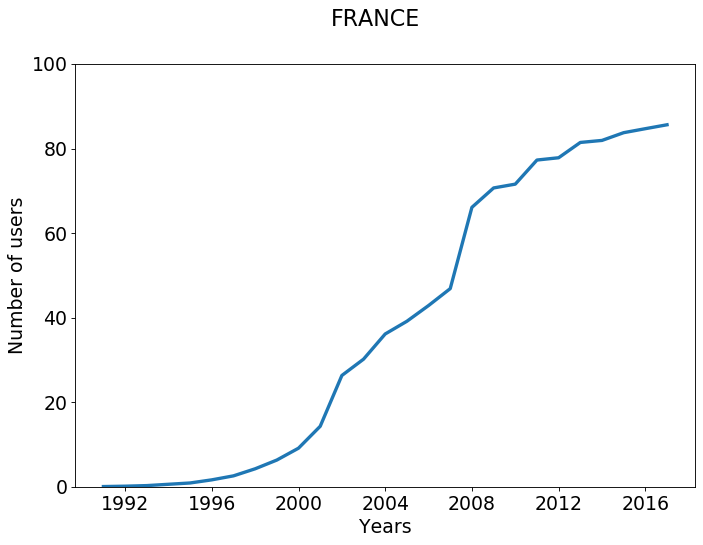

In [766]:
fig = plt.figure(figsize=(10, 7), dpi = 80, facecolor='w', edgecolor='k')

fig.suptitle('FRANCE',fontsize=20)

data1 = internetUsers.loc[internetUsers['Country Name'] == 'France','1990':'2016']
print(np.max(data1,axis=1))

plt.plot(years,np.transpose(data1.values),linewidth = 3.0)
plt.ylim(0,100)

plt.xlabel('Years')
plt.ylabel('Number of users')
#plt.title('mmm')
    
plt.savefig('temporal_evolution_of_internet_users_france.png',bbox_inches="tight")
plt.show()

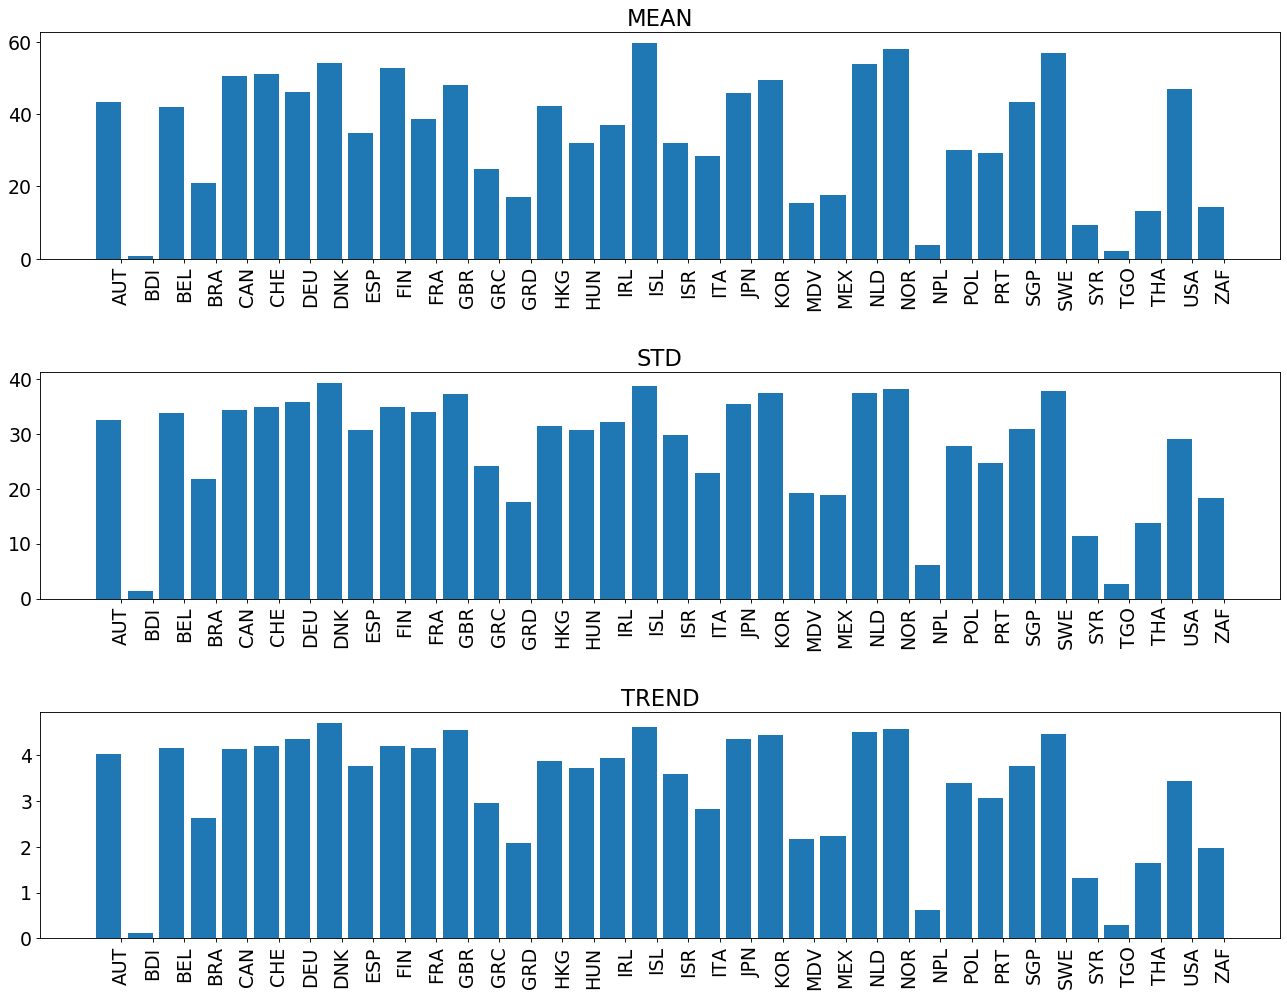

In [769]:
fig = plt.figure(figsize=(20, 15), dpi= 80, facecolor='w', edgecolor='k')

x = np.arange(internetUsers.shape[0])
width = 0.8

ax1 = plt.subplot(3,1,1)
ax1.bar(x - width/2,internetUsers['MEAN'].values,width)
ax1.set_title('MEAN')
ax1.set_xticks(np.arange(len(internetUsers['Country Code'].values)))
ax1.set_xticklabels(internetUsers['Country Code'].values)
plt.xticks(rotation=90)

ax2 = plt.subplot(3,1,2)
ax2.bar(x - width/2,internetUsers['STD'].values,width)
ax2.set_title('STD')
ax2.set_xticks(np.arange(len(internetUsers['Country Code'].values)))
ax2.set_xticklabels(internetUsers['Country Code'].values)
plt.xticks(rotation=90)

ax2 = plt.subplot(3,1,3)
ax2.bar(x - width/2,internetUsers['TREND'].values,width)
ax2.set_title('TREND')
ax2.set_xticks(np.arange(len(internetUsers['Country Code'].values)))
ax2.set_xticklabels(internetUsers['Country Code'].values)

plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.xticks(rotation=90)
plt.savefig('central_tendency_internet_users.png',bbox_inches="tight")
plt.show()

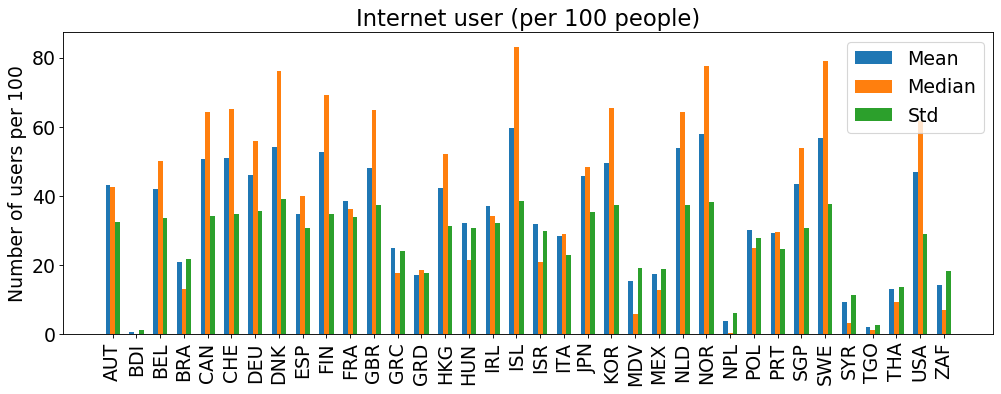

In [770]:
data = internetUsers[['MEAN','MEDIAN','STD']]

width = 0.2
x = np.arange(len(data.index))

fig = plt.figure(figsize=(15, 5), dpi= 80, facecolor='w', edgecolor='k')

ax1 = plt.subplot()

bar1 = ax1.bar(x - width,data['MEAN'].values,width,label='Mean')
bar2 = ax1.bar(x,data['MEDIAN'].values,width,label='Median')
bar3 = ax1.bar(x + width,data['STD'].values,width,label='Std')

ax1.set_ylabel('Number of users per 100')
ax1.set_title('Internet user (per 100 people)')
ax1.set_xticks(x)
ax1.set_xticklabels(internetUsers['Country Code'].values,rotation=90)
ax1.legend()

plt.savefig('central_tendency_internet_users_2.png',bbox_inches="tight")
plt.show()

In [771]:
internetUsersByRegion = get_data(internetUsers,'region',indicator)

colIdx = ['Country Code','Region','Country Name','MEAN','MEDIAN','STD','VARIANCE','TREND']
internetUsersByRegion = internetUsers[colIdx].groupby(['Region']).mean()
internetUsersByRegion.head()

,MEAN,MEDIAN,STD,VARIANCE,TREND
Region,,,,,
East Asia & Pacific,38.817894,45.854456,29.739569,954.251939,3.613519
Europe & Central Asia,43.191114,50.614211,33.022763,1114.722928,4.009021
Latin America & Caribbean,18.556050,14.917589,19.398067,379.352957,2.313141
Middle East & North Africa,20.648314,12.135881,20.560188,507.627136,2.452955
North America,48.835215,62.948559,31.689683,1011.161493,3.785628


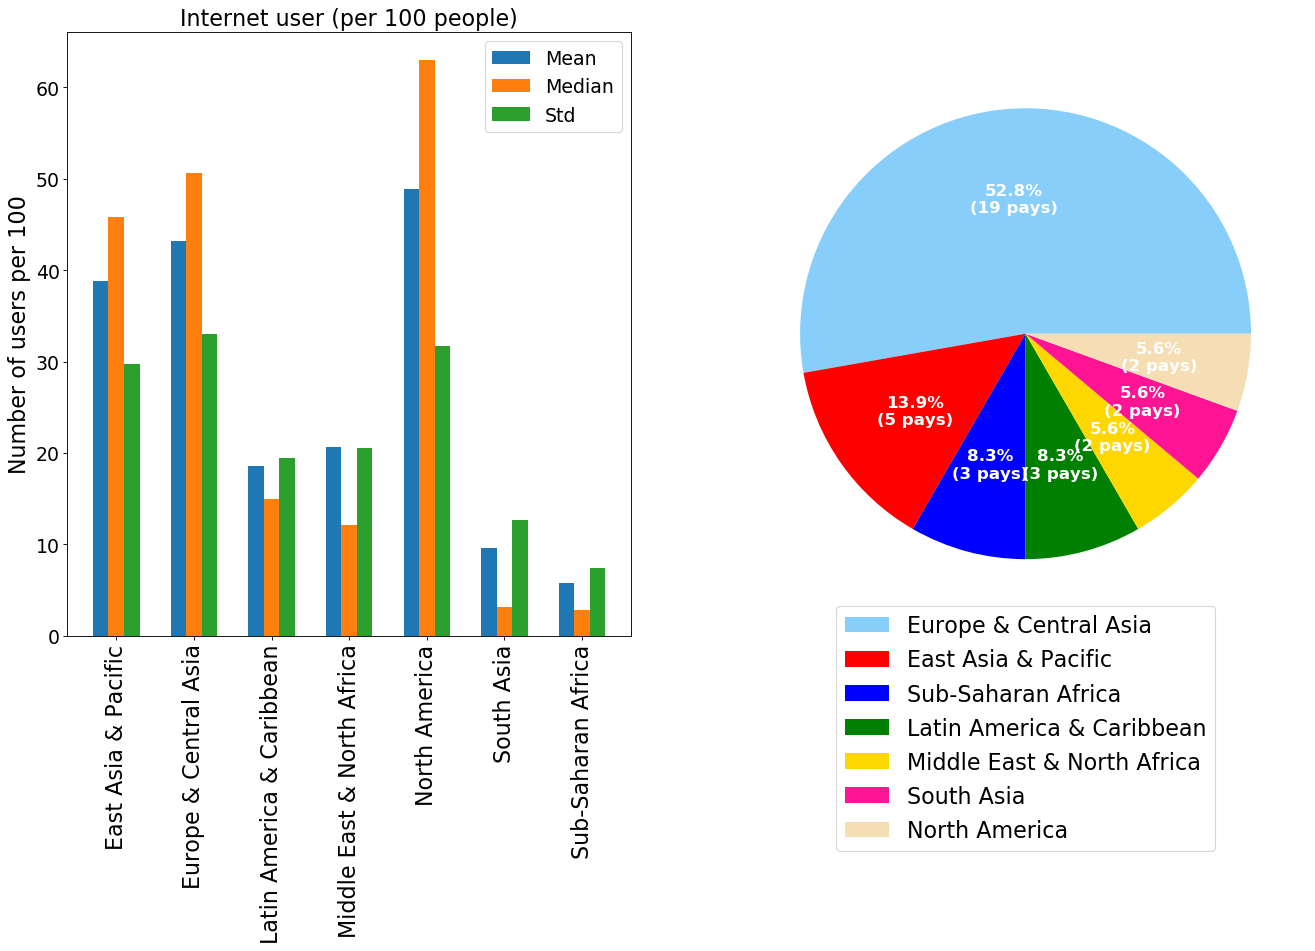

In [775]:
data = internetUsersByRegion[['MEAN','MEDIAN','STD']]

width = 0.2
x = np.arange(len(data.index))

fig = plt.figure(figsize=(20, 10), dpi= 80, facecolor='w', edgecolor='k')

ax1 = plt.subplot(1,2,1)

bar1 = ax1.bar(x - width,data['MEAN'].values,width,label='Mean')
bar2 = ax1.bar(x,data['MEDIAN'].values,width,label='Median')
bar3 = ax1.bar(x + width,data['STD'].values,width,label='Std')

ax1.set_ylabel('Number of users per 100',fontsize=20)
ax1.set_title('Internet user (per 100 people)',fontsize=20)
ax1.set_xticks(x)
ax1.set_xticklabels(data.index,fontsize=20,rotation=90)
ax1.legend()

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d} pays)".format(pct, absolute)

colors = ['lightskyblue', 'red', 'blue', 'green', 'gold','deeppink','wheat']

ax2 = plt.subplot(1,2, 2)

wedges, texts, autotexts = ax2.pie(internetUsers['Region'].value_counts(),
                                   autopct=lambda pct: func(pct, internetUsers['Region'].value_counts())
                                   ,colors=colors,textprops=dict(color="w"))

ax2.legend(wedges, internetUsers['Region'].value_counts().index,
          #title="Regions",
          loc="center",
          fontsize = 20,
          bbox_to_anchor=(0.25, -0.7, 0.5, 1))

plt.setp(autotexts, size=15, weight="bold")

plt.savefig('central_tendency_internet_users_by_region.png',bbox_inches="tight")
plt.show()

In [776]:
indicator = 'Personal computers (per 100 people)'

# Récupération avec la fontion
pc = get_data(edStatsData,'country',indicator).drop(['1970',
                        '1975','1976','1977','1978','1979','1980','1981','1982',
                        '1983','1984','1985','1986','1987','1988','1989','2006',
                        '2007','2008','2009'],axis=1).dropna(how='any')

data = pc.drop(['Country Code','Region','Country Name','Indicator Name'],axis=1)

trend = []

for index, row in pc.iterrows():
    X = np.arange(0,len(row['1990':]),1).reshape(-1,1)
    Y = row['1990':]
    
    trend.append(float(LinearRegression().fit(X,Y).coef_))

pc['MEAN'] = data.mean(axis=1)
pc['MEDIAN'] = data.median(axis=1)
pc['STD'] = data.std(axis=1)
pc['VARIANCE'] = data.var(axis=1)
pc['SKEWNESS'] = data.skew(axis=1)
pc['KURTOSIS'] = data.kurtosis(axis=1)
pc['TREND'] = trend

pc.to_csv('momo.csv')
pc.head()

,Country Code,Region,Country Name,Indicator Name,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,MEAN,MEDIAN,STD,VARIANCE,SKEWNESS,KURTOSIS,TREND
5,ARG,Latin America & Caribbean,Argentina,Personal computers (per 100 people),0.720309,0.876790,0.984463,1.354457,3.436112,3.565567,4.154370,4.777144,5.303337,5.751131,6.937093,7.780356,7.972883,8.164252,8.353177,9.056130,4.949223,5.040241,2.928520,8.576227,-0.175556,-1.395487,0.607879
9,AUT,Europe & Central Asia,Austria,Personal computers (per 100 people),6.518904,7.765546,8.977585,10.162136,11.337547,16.279768,17.479582,21.212549,23.723160,28.721842,36.158420,42.238963,48.196916,55.266790,57.718899,60.641342,28.274997,22.467855,19.165309,367.309060,0.539796,-1.237817,3.918625
12,BEL,Europe & Central Asia,Belgium,Personal computers (per 100 people),8.779102,9.938995,11.940369,13.873532,15.795251,17.713199,19.142482,20.576192,21.520321,21.967403,22.398859,23.299218,27.082004,31.776745,34.738128,37.628187,21.135624,21.048256,8.456159,71.506627,0.476243,-0.352506,1.731730
24,BRA,Latin America & Caribbean,Brazil,Personal computers (per 100 people),0.300705,0.427200,0.614497,0.827967,1.129002,1.667791,2.068222,2.516093,2.950334,3.546380,4.870923,6.102791,7.246629,8.609489,13.042749,16.116693,4.502342,2.733213,4.693346,22.027500,1.433760,1.448061,0.886258
30,CAN,North America,Canada,Personal computers (per 100 people),10.485292,12.495775,14.462475,17.087266,19.661111,21.846807,24.673525,27.455509,31.187209,36.494354,42.023069,45.825982,48.907186,52.181541,70.157122,87.728023,35.167015,29.321359,21.770994,473.976189,1.091730,0.857876,4.312878


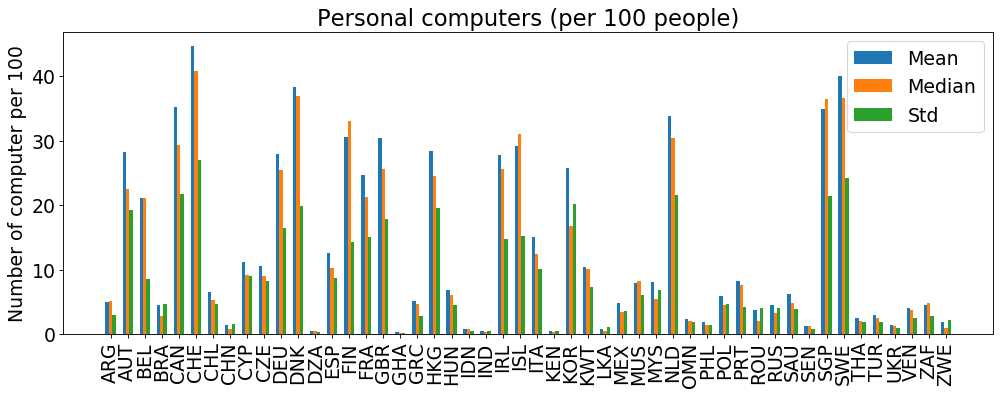

In [777]:
data = pc[['MEAN','MEDIAN','STD']]

width = 0.2
x = np.arange(len(data.index))

fig = plt.figure(figsize=(15, 5), dpi= 80, facecolor='w', edgecolor='k')

ax1 = plt.subplot()

bar1 = ax1.bar(x - width,data['MEAN'].values,width,label='Mean')
bar2 = ax1.bar(x,data['MEDIAN'].values,width,label='Median')
bar3 = ax1.bar(x + width,data['STD'].values,width,label='Std')

ax1.set_ylabel('Number of computer per 100')
ax1.set_title('Personal computers (per 100 people)')
ax1.set_xticks(x)
ax1.set_xticklabels(pc['Country Code'].values,rotation=90)
ax1.legend()

plt.savefig('personnal_computers.png',bbox_inches="tight")
plt.show()

In [778]:
pcByRegion = get_data(pc,'region',indicator)

colIdx = ['Country Code','Region','Country Name','MEAN','MEDIAN','STD','VARIANCE','TREND']
pcByRegion = pc[colIdx].groupby(['Region']).mean()
pcByRegion.head()

,MEAN,MEDIAN,STD,VARIANCE,TREND
Region,,,,,
East Asia & Pacific,12.962275,11.015361,9.191643,163.603967,1.874679
Europe & Central Asia,19.359514,17.611727,11.526960,187.632675,2.357242
Latin America & Caribbean,4.963506,4.016517,3.672570,14.276602,0.735627
Middle East & North Africa,4.876421,4.342125,3.314451,17.858284,0.674048
North America,35.167015,29.321359,21.770994,473.976189,4.312878


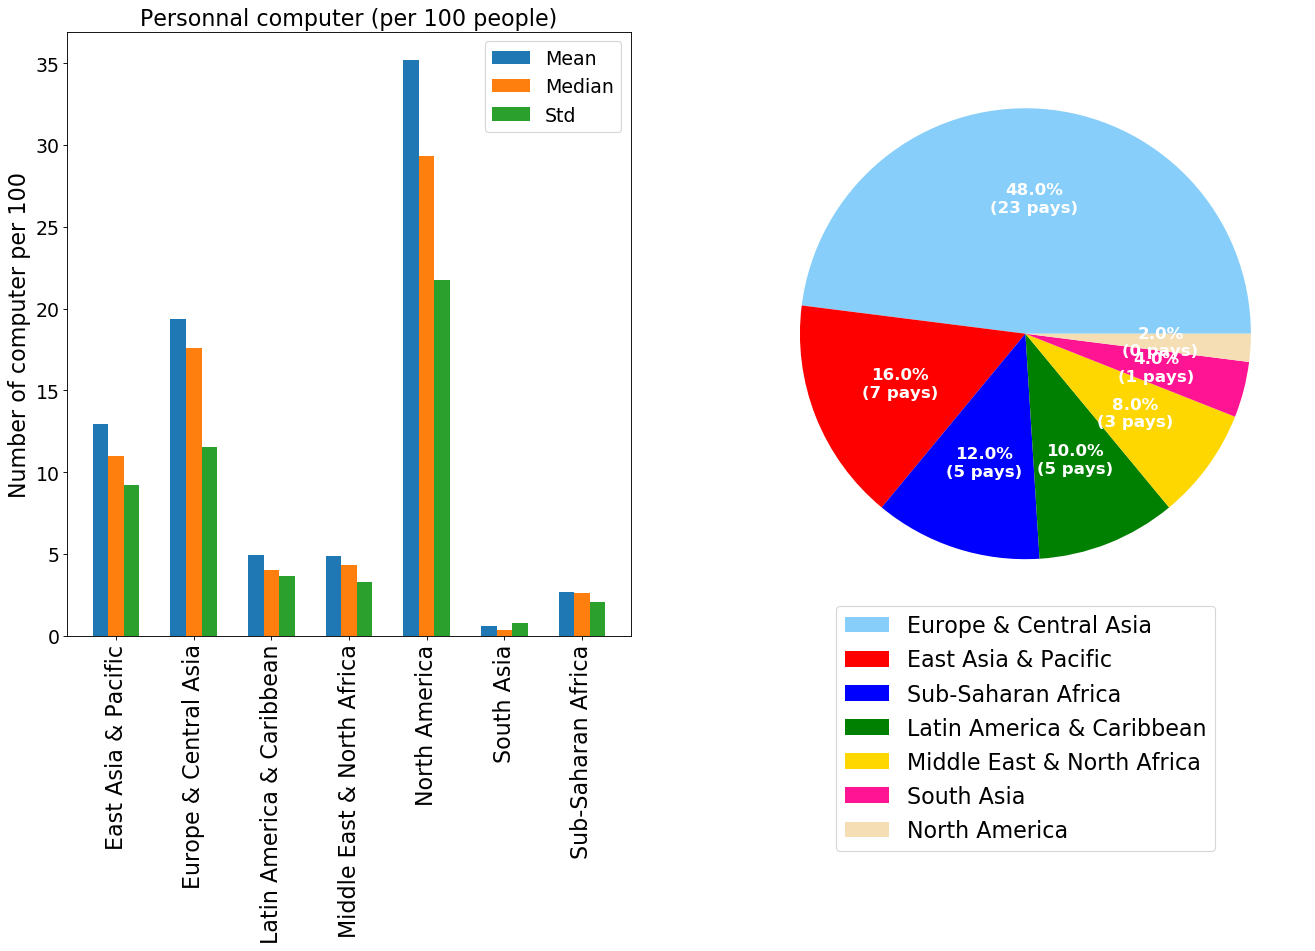

In [780]:
data = pcByRegion[['MEAN','MEDIAN','STD']]

width = 0.2
x = np.arange(len(data.index))

fig = plt.figure(figsize=(20, 10), dpi= 80, facecolor='w', edgecolor='k')

ax1 = plt.subplot(1,2,1)

bar1 = ax1.bar(x - width,data['MEAN'].values,width,label='Mean')
bar2 = ax1.bar(x,data['MEDIAN'].values,width,label='Median')
bar3 = ax1.bar(x + width,data['STD'].values,width,label='Std')

ax1.set_ylabel('Number of computer per 100',fontsize=20)
ax1.set_title('Personnal computer (per 100 people)',fontsize=20)
ax1.set_xticks(x)
ax1.set_xticklabels(data.index,fontsize=20,rotation=90)
ax1.legend()

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d} pays)".format(pct, absolute)

colors = ['lightskyblue', 'red', 'blue', 'green', 'gold','deeppink','wheat']

ax2 = plt.subplot(1,2, 2)

wedges, texts, autotexts = ax2.pie(pc['Region'].value_counts(),
                                   autopct=lambda pct: func(pct, pc['Region'].value_counts())
                                   ,colors=colors,textprops=dict(color="w"))

ax2.legend(wedges, pc['Region'].value_counts().index,
          #title="Regions",
          loc="center",
          fontsize = 20,
          bbox_to_anchor=(0.25, -0.7, 0.5, 1))

plt.setp(autotexts, size=15, weight="bold")

plt.savefig('personnal_computers_by_region.png',bbox_inches="tight")
plt.show()

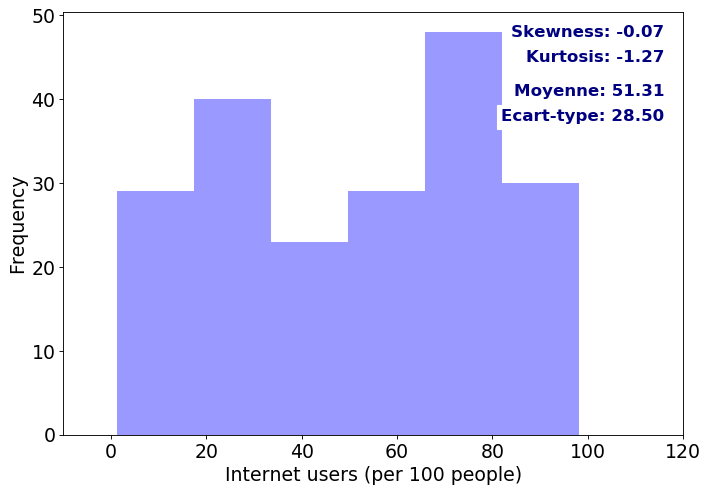

In [788]:
indicator = 'Internet users (per 100 people)'

internetUsers = get_data(edStatsData,'country',indicator)

internetUsers.to_csv('momo.csv')

fig = plt.figure(figsize=(10, 7), dpi= 80, facecolor='w', edgecolor='k')

internetUsers2016 = internetUsers['2016'].dropna()

ax = sns.distplot(internetUsers2016,kde = False,color="blue")

ax.text(x=0.97, y=0.97, transform=ax.transAxes, s="Skewness: %.2f" % internetUsers2016.skew(),\
        fontweight='demibold', fontsize=15, verticalalignment='top', horizontalalignment='right',\
        backgroundcolor='white', color='navy')
ax.text(x=0.97, y=0.91, transform=ax.transAxes, s="Kurtosis: %.2f" % internetUsers2016.kurt(),\
        fontweight='demibold', fontsize=15, verticalalignment='top', horizontalalignment='right',\
        backgroundcolor='white', color='navy')
ax.text(x=0.97, y=0.83, transform=ax.transAxes, s="Moyenne: %.2f" % internetUsers2016.mean(),\
        fontweight='demibold', fontsize=15, verticalalignment='top', horizontalalignment='right',\
        backgroundcolor='white', color='navy')
ax.text(x=0.97, y=0.77, transform=ax.transAxes, s="Ecart-type: %.2f" % internetUsers2016.std(),\
        fontweight='demibold', fontsize=15, verticalalignment='top', horizontalalignment='right',\
        backgroundcolor='white', color='navy')

plt.xlabel('Internet users (per 100 people)',fontsize=17)
plt.ylabel('Frequency',fontsize=17)
plt.xlim(-10,120)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)

plt.savefig('distribution_of_internet_users_2016.png',bbox_inches="tight")
plt.show()

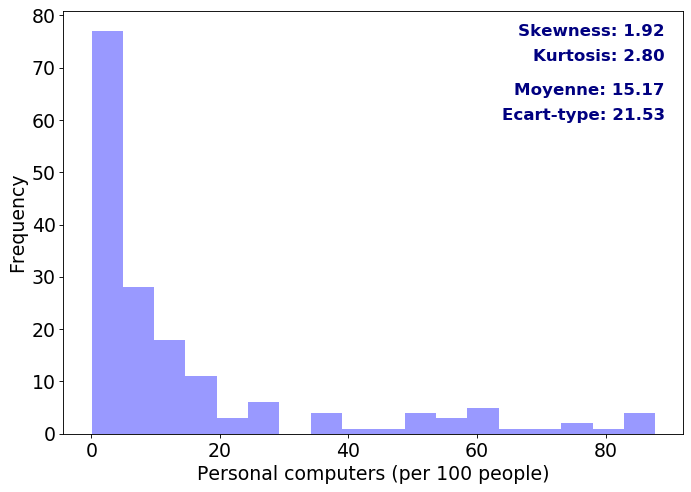

In [789]:
indicator = 'Personal computers (per 100 people)'

personnalComputers = get_data(edStatsData,'country',indicator)

personnalComputers.to_csv('momo.csv')

fig = plt.figure(figsize=(10, 7), dpi= 80, facecolor='w', edgecolor='k')

personnalComputers2005 = personnalComputers['2005'].dropna()

ax = sns.distplot(personnalComputers2005,kde = False,color="blue")

ax.text(x=0.97, y=0.97, transform=ax.transAxes, s="Skewness: %.2f" % personnalComputers2005.skew(),\
        fontweight='demibold', fontsize=15, verticalalignment='top', horizontalalignment='right',\
        backgroundcolor='white', color='navy')
ax.text(x=0.97, y=0.91, transform=ax.transAxes, s="Kurtosis: %.2f" % personnalComputers2005.kurt(),\
        fontweight='demibold', fontsize=15, verticalalignment='top', horizontalalignment='right',\
        backgroundcolor='white', color='navy')
ax.text(x=0.97, y=0.83, transform=ax.transAxes, s="Moyenne: %.2f" % personnalComputers2005.mean(),\
        fontweight='demibold', fontsize=15, verticalalignment='top', horizontalalignment='right',\
        backgroundcolor='white', color='navy')
ax.text(x=0.97, y=0.77, transform=ax.transAxes, s="Ecart-type: %.2f" % personnalComputers2005.std(),\
        fontweight='demibold', fontsize=15, verticalalignment='top', horizontalalignment='right',\
        backgroundcolor='white', color='navy')

plt.xlabel('Personal computers (per 100 people)',fontsize=17)
plt.ylabel('Frequency',fontsize=17)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)

plt.savefig('distribution_of_personnal_computers_2005.png',bbox_inches="tight")
plt.show()

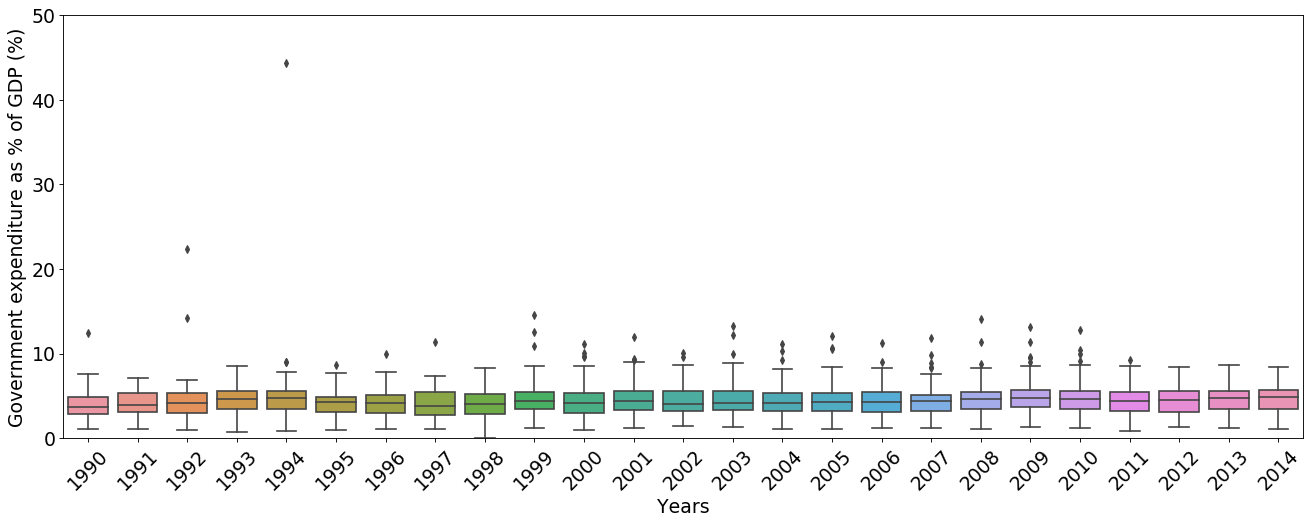

In [803]:
indicator = 'Government expenditure on education as % of GDP (%)'

# Récupération avec la fontion
govExpenditureAsPerOfGDP = get_data(edStatsData,'country',indicator)

govExpenditureAsPerOfGDP.to_csv('momo.csv')
govExpenditureAsPerOfGDP.head()

fig = plt.figure(figsize=(20, 7), dpi= 80, facecolor='w', edgecolor='k')

data = govExpenditureAsPerOfGDP.loc[:,'1990':'2014']
data[data > 100.0] = np.nan

#fig = plt.figure(figsize=(10, 7), dpi= 80, facecolor='w', edgecolor='k')

ax = sns.boxplot(x="variable",y="value",data = pd.melt(data))
ax.set_xticklabels(data.columns,rotation=45)

plt.xlabel('Years')
plt.ylabel('Government expenditure as % of GDP (%)')
plt.ylim(0,50)
plt.show()

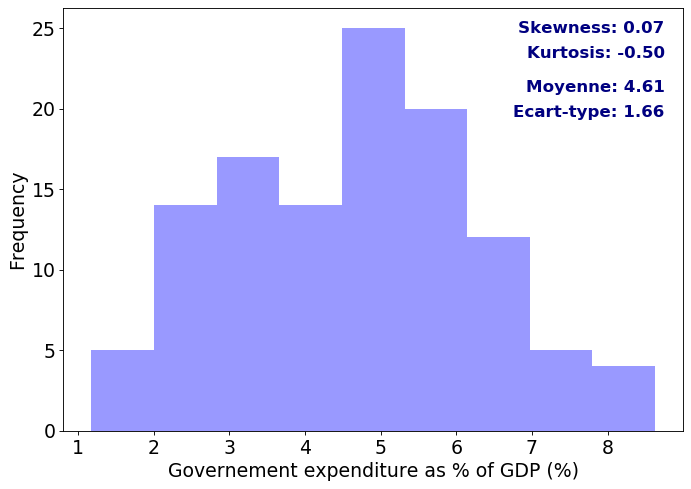

In [804]:
fig = plt.figure(figsize=(10, 7), dpi= 80, facecolor='w', edgecolor='k')

data2013 = data['2013'].dropna()

ax = sns.distplot(data2013,kde=False,color="blue")

ax.text(x=0.97, y=0.97, transform=ax.transAxes, s="Skewness: %.2f" % data2013.skew(),\
        fontweight='demibold', fontsize=15, verticalalignment='top', horizontalalignment='right',\
        backgroundcolor='white', color='navy')
ax.text(x=0.97, y=0.91, transform=ax.transAxes, s="Kurtosis: %.2f" % data2013.kurt(),\
        fontweight='demibold', fontsize=15, verticalalignment='top', horizontalalignment='right',\
        backgroundcolor='white', color='navy')
ax.text(x=0.97, y=0.83, transform=ax.transAxes, s="Moyenne: %.2f" % data2013.mean(),\
        fontweight='demibold', fontsize=15, verticalalignment='top', horizontalalignment='right',\
        backgroundcolor='white', color='navy')
ax.text(x=0.97, y=0.77, transform=ax.transAxes, s="Ecart-type: %.2f" % data2013.std(),\
        fontweight='demibold', fontsize=15, verticalalignment='top', horizontalalignment='right',\
        backgroundcolor='white', color='navy')

plt.xlabel('Governement expenditure as % of GDP (%)',fontsize=17)
plt.ylabel('Frequency',fontsize=17)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)

plt.savefig('distribution_of_governement_expenditure_2013.png',bbox_inches="tight")
plt.show()

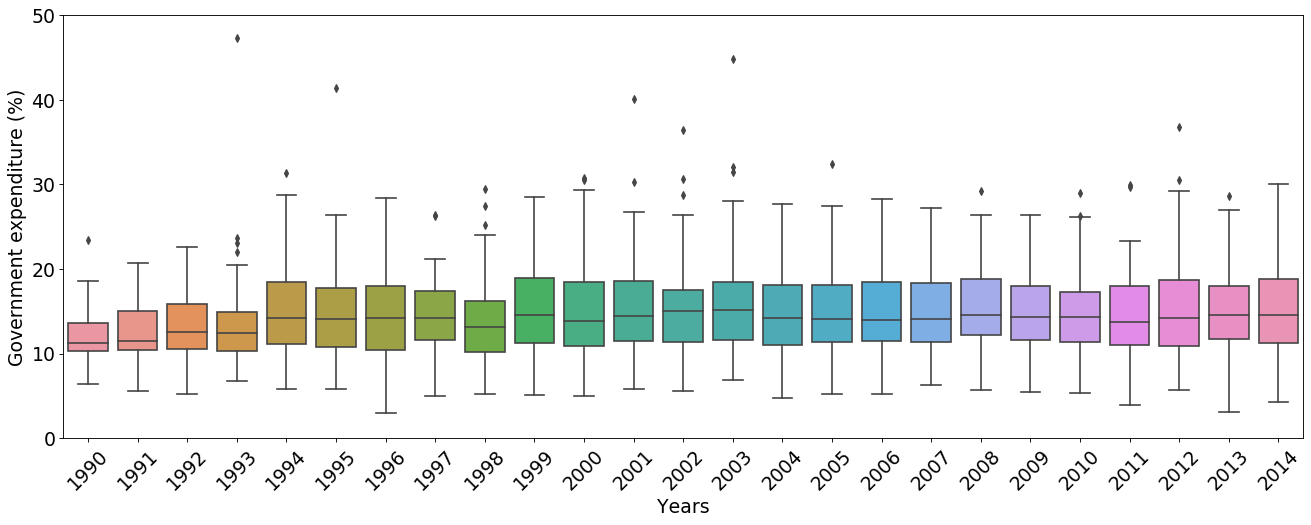

In [805]:
indicator = 'Expenditure on education as % of total government expenditure (%)'

# Récupération avec la fontion
publicExpenditure = get_data(edStatsData,'country',indicator)

publicExpenditure.to_csv('momo.csv')
publicExpenditure.head()

fig = plt.figure(figsize=(20, 7), dpi= 80, facecolor='w', edgecolor='k')

data = publicExpenditure.loc[:,'1990':'2014']
data[data > 100.0] = np.nan

ax = sns.boxplot(x="variable",y="value",data = pd.melt(data))
ax.set_xticklabels(data.columns,rotation=45)

plt.xlabel('Years')
plt.ylabel('Government expenditure (%)')
plt.ylim(0,50)
plt.show()

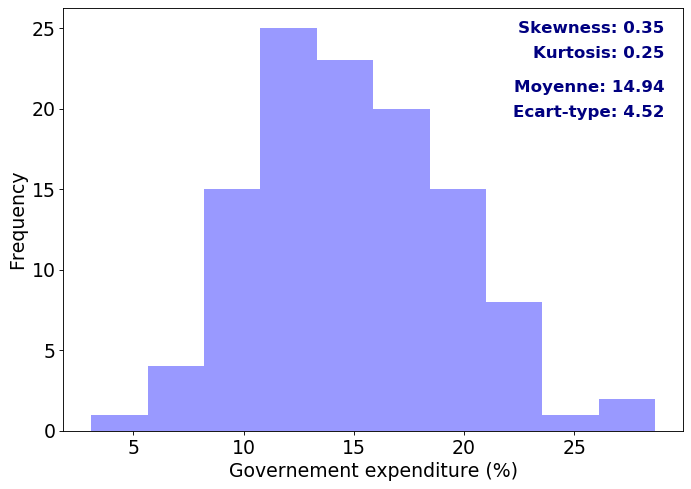

In [807]:
fig = plt.figure(figsize=(10, 7), dpi= 80, facecolor='w', edgecolor='k')

data2013 = data['2013'].dropna()

ax = sns.distplot(data2013,kde=False,color="blue")

ax.text(x=0.97, y=0.97, transform=ax.transAxes, s="Skewness: %.2f" % data2013.skew(),\
        fontweight='demibold', fontsize=15, verticalalignment='top', horizontalalignment='right',\
        backgroundcolor='white', color='navy')
ax.text(x=0.97, y=0.91, transform=ax.transAxes, s="Kurtosis: %.2f" % data2013.kurt(),\
        fontweight='demibold', fontsize=15, verticalalignment='top', horizontalalignment='right',\
        backgroundcolor='white', color='navy')
ax.text(x=0.97, y=0.83, transform=ax.transAxes, s="Moyenne: %.2f" % data2013.mean(),\
        fontweight='demibold', fontsize=15, verticalalignment='top', horizontalalignment='right',\
        backgroundcolor='white', color='navy')
ax.text(x=0.97, y=0.77, transform=ax.transAxes, s="Ecart-type: %.2f" % data2013.std(),\
        fontweight='demibold', fontsize=15, verticalalignment='top', horizontalalignment='right',\
        backgroundcolor='white', color='navy')

plt.xlabel('Governement expenditure (%)',fontsize=17)
plt.ylabel('Frequency',fontsize=17)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)

plt.savefig('distribution_of_public_expenditure_2013.png',bbox_inches="tight")
plt.show()

In [808]:
indicator = 'PIAAC: Young adults by proficiency level in problem solving in technology-rich environments (%). Level 1'

# Récupération avec la fontion
#saberEIP = get_data(edStatsData,'country',indicator)

saberEIP = pd.read_csv('EdStatsData.csv')
saberEIP = saberEIP.loc[saberEIP['Indicator Name'] == indicator]

saberEIP.to_csv('momo.csv')

print(100.0 * saberEIP.isna().sum().sum()/saberEIP.size)
saberEIP.head()

94.13223140495867


,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
2178,Arab World,ARB,PIAAC: Young adults by proficiency level in pr...,LO.PIAAC.TEC.YOU.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5843,East Asia & Pacific,EAS,PIAAC: Young adults by proficiency level in pr...,LO.PIAAC.TEC.YOU.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9508,East Asia & Pacific (excluding high income),EAP,PIAAC: Young adults by proficiency level in pr...,LO.PIAAC.TEC.YOU.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13173,Euro area,EMU,PIAAC: Young adults by proficiency level in pr...,LO.PIAAC.TEC.YOU.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16838,Europe & Central Asia,ECS,PIAAC: Young adults by proficiency level in pr...,LO.PIAAC.TEC.YOU.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


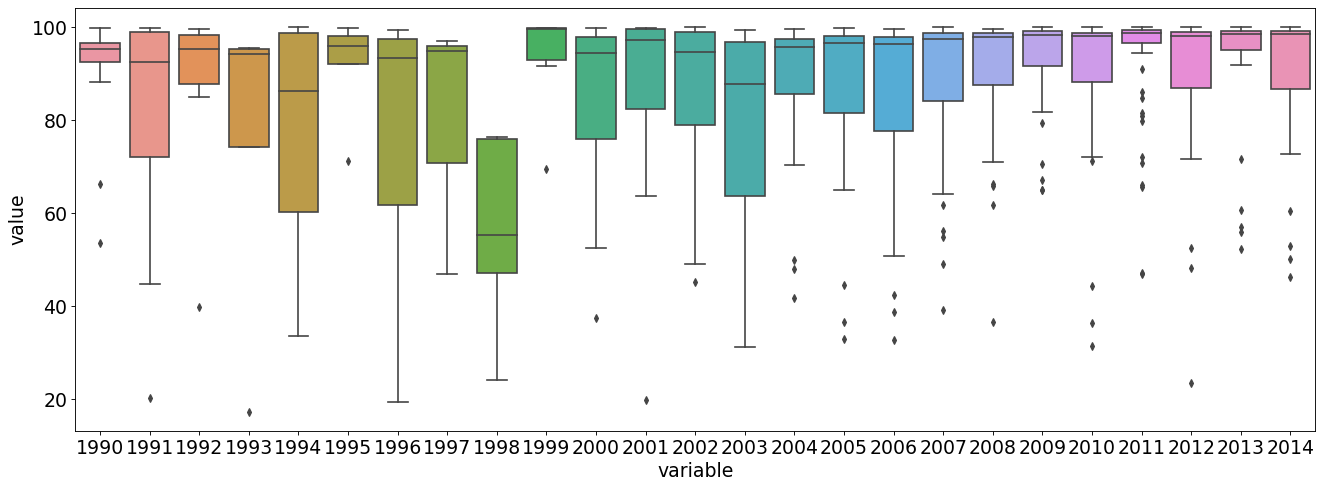

In [809]:
indicator = 'Youth literacy rate, population 15-24 years, both sexes (%)'

# Récupération avec la fontion
youthLiteracy = get_data(edStatsData,'country',indicator)

youthLiteracy.to_csv('momo.csv')
youthLiteracy.head()

fig = plt.figure(figsize=(20, 7), dpi= 80, facecolor='w', edgecolor='k')

data = youthLiteracy.loc[:,'1990':'2014']
data[data > 100.0] = np.nan

ax = sns.boxplot(x="variable",y="value",data = pd.melt(data))

plt.show()

Je me donne une métrique d'évaluation notée ${M}_{R}$
\begin{equation}
 {M}_{R}=1-\frac{1}{1\times\,n\times\,m}\sum_{i=1}^{m}{rang}_{i}
\end{equation}

où $m$ représente le nombre d'indicateurs évalués, $n$ le nombre total de pays et ${rang}_{i}$ le rang du pays pour chaque indicateur. La métrique d'évaluation ${M}_{R}$ est toujours inférieure à 1. Plus cette valeur est proche de 1, plus le pays dispose d'un potentiel important.

In [512]:
import scipy.stats as ss

def get_data_new(dataFrame,area,indicator):
    if area == 'region':
        checklist = validRegion
    else:
        checklist = validCountry
        
    tab = dataFrame[dataFrame['Country Name'].isin(checklist)]
    
    yearList = list(map(str,range(1970,2100,1)))
    validYearColumns = [yy for yy in yearList if yy in dataFrame.columns]
    
    tab = tab.loc[tab['Indicator Name'] == indicator].dropna(how='all', subset=validYearColumns)
    
    return tab

### Indicateurs retenus

# Population, ages 15-24, total
# Internet users (per 100 people)
# Expenditure on education as % of total government expenditure (%)

data = pd.DataFrame(index=sorted(validCountry),columns=['POP1524','IU','EXP'])

indicator = 'Population, ages 15-24, total'
testData = get_data_new(edStatsData,'country',indicator)
testData['MEAN'] = testData.mean(axis=1)

for country in sorted(validCountry):
    if testData.loc[testData['Country Name'] == country,'MEAN'].size > 0:
        data.loc[country,'POP1524'] = float(testData.loc[testData['Country Name'] == country,'MEAN'].values)
    
indicator = 'Internet users (per 100 people)'
testData = get_data_new(edStatsData,'country',indicator)

for country in sorted(validCountry):
    if testData.loc[testData['Country Name'] == country,'2016'].size > 0:
        data.loc[country,'IU'] = float(testData.loc[testData['Country Name'] == country,'2016'].values)

indicator = 'Expenditure on education as % of total government expenditure (%)'
testData = get_data_new(edStatsData,'country',indicator)

for country in sorted(validCountry):
    if testData.loc[testData['Country Name'] == country,'2013'].size > 0:
        data.loc[country,'EXP'] = float(testData.loc[testData['Country Name'] == country,'2013'].values)

#testData.to_csv('momo.csv')
data = data.dropna(how='any')

print(data.shape)

pd.options.display.max_rows = 111
data.head(n=111)

(111, 3)


,POP1524,IU,EXP
Afghanistan,4.66058e+06,10.5957,14.1028
Albania,577455,66.3634,12.1239
Argentina,6.43851e+06,70.1508,15.2624
Armenia,538122,62,11.1368
Aruba,11940.8,93.5425,21.8746
Australia,2.77619e+06,88.2387,14.0459
Austria,1.01104e+06,84.3233,10.9517
Azerbaijan,1.56431e+06,78.2,6.39518
Bahrain,110750,98,8.24382
Bangladesh,2.92705e+07,18.2469,13.8228


In [513]:
newData = data.rank(ascending=False).astype(int)
shape = newData.shape
print(shape)

newData['MR'] = 1 - 1/(1*shape[0]*shape[1]) * newData.sum(axis=1)

pd.options.display.max_rows = 111
newData.head(n=111)

(111, 3)


,POP1524,IU,EXP,MR
Afghanistan,29,102,59,0.429429
Albania,82,45,81,0.375375
Argentina,23,43,50,0.651652
Armenia,85,48,90,0.330330
Aruba,111,7,7,0.624625
Australia,38,14,61,0.660661
Austria,68,20,93,0.456456
Azerbaijan,54,31,111,0.411411
Bahrain,101,2,108,0.366366
Bangladesh,6,92,67,0.504505


In [514]:
newData = newData.sort_values(by=['MR'],ascending=False)
newData['Rank'] = newData['MR'].rank(method='first',ascending=False).astype(int)

pd.options.display.max_rows = 111
newData.head(n=111)

,POP1524,IU,EXP,MR,Rank
"Iran, Islamic Rep.",11,58,8,0.768769,1
Malaysia,30,30,17,0.768769,2
South Africa,16,57,19,0.723724,3
Mexico,7,52,35,0.717718,4
United Kingdom,19,5,72,0.711712,5
Thailand,14,63,22,0.702703,6
Vietnam,8,66,25,0.702703,7
Brazil,4,51,45,0.699700,8
"Hong Kong SAR, China",72,16,14,0.693694,9
Chile,41,47,16,0.687688,10


In [515]:
newData.to_csv('rank.csv')